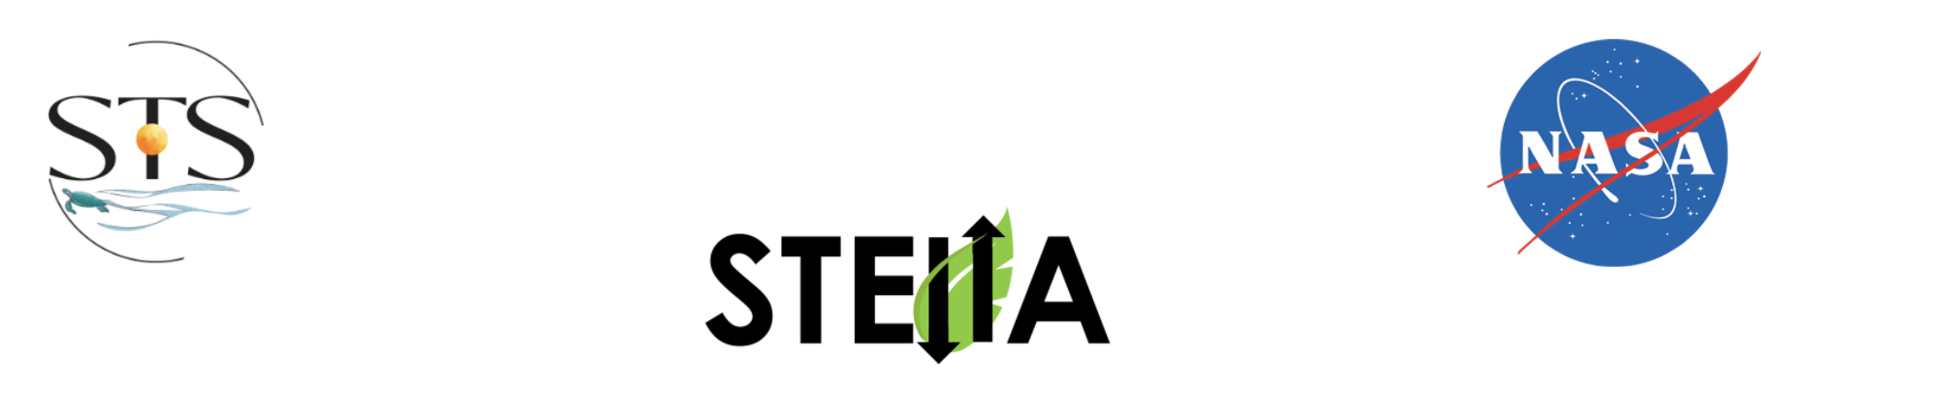


# **Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer**

The **Science and Technology Society (STS) of Sarasota-Manatee Counties, Florida** is working with the NASA STELLA (Science and Technology Education for Land/Life Assessment) outreach program as a part of our STEM initiative. According to their site, 

- "NASA STELLA instruments are portable low-cost do-it-yourself (DIY) instruments that support science education, and outreach through scientific engagement, inquiry, and discovery while helping you understand Landsat better". 

**STELLA instruments are developed under the influence and inspiration of Landsat.** This alignment not only fulfills our project needs but also serves as a compelling addition to our STEAM initiatives:

1) To train the minds young Floridians to be more aware of our wetlands, to care for them and about them.  Our program will bring more community publicity to the issue of wetlands change, as well.

2) To expose our middle- and high- school aged students to real science, using real data.  That means how to use instrumentation and understand how the data is collected, and how the data can be used in the real world.  It means not only to create beautiful charts and images that form the good results, but also to understand that data must be collected in a proper and reproducible way, that there physics reasons for lack of accuracy and lack of precision that one must understand and minimize in order to achieve meaningful results.


The NASA STELLA-Q2 is capable of making 18 different spectral measurements from the violet/blue portions of the electromagnetic spectrum out to near infrared regions (beyond our range of vision).The following figure **(1)** shows the visible spectrum by wavelength, and the yellow box indicates the STELLA-Q2 frequency range. 

>![image](wavelengths.png)


More can be found on the STELLA DIY instruments at the following link.

>https://landsat.gsfc.nasa.gov/stella/


The **Science and Technology Society (STS)** of Sarasota-Manatee Counties, FL have created a Jupyter Notebook to load raw **NASA STELLA-Q2** spectrometer data, white-card correct the wavelength data and then use **Decision Tree** and **Knn** to differentiate plant species based on the **mean End-Members** reference data where the **Normalized Difference Vegetative Index (NDVI)** is key to this analysis. NDVI is calculated:

    NDVI = (Near IR irradiance – Red irradiance)/( Near IR irradiance + Red irradiance)


The STELLA-Q2 is a NASA configured hand-held spectrometer designed by Paul Mirel at NASA. The unit is relatively inexpensive and is used to collect End-Member data that can then be used to calibrate Landsat interpretations. Mike Taylor of NASA heads up the STELLA team, and he and his entire team have been so immensely helpful as we delve into calibrated Landsat interpretations. 

In our notebooks we employ a few novel python methods using Altair and Panel to display the actual plant species images along the time-series NDVI data for each of the spectrometer readings. This helps us better understand the subtle differences in the STELLA data and calculated values. 

>
>![animated](STELLA_with_Photos.gif)
>
>


## **These are all of the vegetative species wavelength plots after the white-card corrections:**

>
>![animated](wavelengths.png)
>

## **The Decision Tree method allows us to better understand the logic use in differentiating one species from the other:**

>
>![animated](DecisionTree.png)
>

## **These are the various mean End-Members for each species used with Knn:**

>
>![animated](EndMember.png)
>

## **and these are the natural clusters for each species in red, near IR and NDVI space:**

>
>![animated](3D.png)
>





### Load Python requirments:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import ipywidgets as widgets
from IPython.display import display


#import altair as alt
####import panel as pn
#pn.extension('vega')
#pn.extension('tabulator')
#####pn.extension(sizing_mode = 'stretch_width')
#######alt.data_transformers.disable_max_rows()

# **Read in Excel data file collected on the STELLA-Q2 micro SD card:**

In [2]:
#read the file
file = r'data_Nick_HomeDepot.xlsx'
df = pd.read_excel(file,index_col=False)

# Remove leading/trailing whitespaces in column names
df.columns = df.columns.str.strip()
df.head()

device_type software_version   UID  Test_number  Test          ImageName  \
0   STELLA-Q2            2.4.0  6858            0  Palm  ./photos/Palm.jpg   
1   STELLA-Q2            2.4.0  6858            1  Palm  ./photos/Palm.jpg   
2   STELLA-Q2            2.4.0  6858            2  Palm  ./photos/Palm.jpg   
3   STELLA-Q2            2.4.0  6858            3  Palm  ./photos/Palm.jpg   
4   STELLA-Q2            2.4.0  6858            4  Palm  ./photos/Palm.jpg   

   batch  weekday  timestamp_iso8601  decimal_hour  ...  \
0      1   Friday   20240531T201526Z       20.2572  ...   
1      1   Friday   20240531T201527Z       20.2575  ...   
2      1   Friday   20240531T201529Z       20.2580  ...   
3      1   Friday   20240531T201531Z       20.2586  ...   
4      1   Friday   20240531T201532Z       20.2589  ...   

   irradiance_900nm_wheat_wavelength_nm  \
0                                   900   
1                                   900   
2                                   900   
3                                   900   
4                                   900   

   irradiance_900nm_wheat_wavelength_uncertainty_nm  \
0                                                10   
1                                                10   
2                                                10   
3                                                10   
4                                                10   

   irradiance_900nm_wheat_irradiance_uW_per_cm_squared  \
0                                            1930.44     
1                                            1984.89     
2                                            1934.33     
3                                            1835.41     
4                                            1936.55     

   irradiance_900nm_wheat_irradiance_uncertainty_uW_per_cm_squared  \
0                                            231.652                 
1                                            238.187                 
2                                            232.119                 
3                                            220.250                 
4                                            232.386                 

   irradiance_940nm_gold_wavelength_nm  \
0                                  940   
1                                  940   
2                                  940   
3                                  940   
4                                  940   

   irradiance_940nm_gold_wavelength_uncertainty_nm  \
0                                               10   
1                                               10   
2                                               10   
3                                               10   
4                                               10   

   irradiance_940nm_gold_irradiance_uW_per_cm_squared  \
0                                            879.704    
1                                            899.998    
2                                            859.410    
3                                            786.175    
4                                            930.880    

   irradiance_940nm_gold_irradiance_uncertainty_uW_per_cm_squared  \
0                                            105.564                
1                                            108.000                
2                                            103.129                
3                                             94.341                
4                                            111.706                

   battery_voltage  battery_percent  
0             4.12               92  
1             4.12               92  
2             4.12               92  
3             4.12               92  
4             4.11               92  

[5 rows x 86 columns]

## Explore the data:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 86 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   device_type                                                           76 non-null     object 
 1   software_version                                                      76 non-null     object 
 2   UID                                                                   76 non-null     int64  
 3   Test_number                                                           76 non-null     int64  
 4   Test                                                                  76 non-null     object 
 5   ImageName                                                             76 non-null     object 
 6   batch                                                                 76 non-null     int64  
 7   w

## We did alter the original code.py file on the STELLA-Q2 to use actual color names for the following column data vs. *near IR* as in the original STELLA-Q2 code.py code file.

     49   irradiance_680nm_black_wavelength_nm                                  60 non-null     int64  
     50   irradiance_680nm_black_wavelength_uncertainty_nm                      60 non-null     int64  
     51   irradiance_680nm_black_irradiance_uW_per_cm_squared                   60 non-null     float64
     52   irradiance_680nm_black_irradiance_uncertainty_uW_per_cm_squared       60 non-null     float64
     53   irradiance_705nm_brown_wavelength_nm                                  60 non-null     int64  
     54   irradiance_705nm_brown_wavelength_uncertainty_nm                      60 non-null     int64  
     55   irradiance_705nm_brown_irradiance_uW_per_cm_squared                   60 non-null     float64
     56   irradiance_705nm_brown_irradiance_uncertainty_uW_per_cm_squared       60 non-null     float64
     57   irradiance_730nm_gray_wavelength_nm                                   60 non-null     int64  
     58   irradiance_730nm_gray_wavelength_uncertainty_nm                       60 non-null     int64  
     59   irradiance_730nm_gray_irradiance_uW_per_cm_squared                    60 non-null     float64
     60   irradiance_730nm_gray_irradiance_uncertainty_uW_per_cm_squared        60 non-null     float64
     61   irradiance_760nm_silver_wavelength_nm                                 60 non-null     int64  
     62   irradiance_760nm_silver_wavelength_uncertainty_nm                     60 non-null     int64  
     63   irradiance_760nm_silver_irradiance_uW_per_cm_squared                  60 non-null     float64
     64   irradiance_760nm_silver_irradiance_uncertainty_uW_per_cm_squared      60 non-null     float64
     65   irradiance_810nm_lightgray_wavelength_nm                              60 non-null     int64  
     66   irradiance_810nm_lightgray_wavelength_uncertainty_nm                  60 non-null     int64  
     67   irradiance_810nm_lightgray_irradiance_uW_per_cm_squared               60 non-null     float64
     68   irradiance_810nm_lightgray_irradiance_uncertainty_uW_per_cm_squared   60 non-null     float64
     69   irradiance_860nm_linen_wavelength_nm                                  60 non-null     int64  
     70   irradiance_860nm_linen_wavelength_uncertainty_nm                      60 non-null     int64  
     71   irradiance_860nm_linen_irradiance_uW_per_cm_squared                   60 non-null     float64
     72   irradiance_860nm_linen_irradiance_uncertainty_uW_per_cm_squared       60 non-null     float64
     73   irradiance_900nm_wheat_wavelength_nm                                  60 non-null     int64  
     74   irradiance_900nm_wheat_wavelength_uncertainty_nm                      60 non-null     int64  
     75   irradiance_900nm_wheat_irradiance_uW_per_cm_squared                   60 non-null     float64
     76   irradiance_900nm_wheat_irradiance_uncertainty_uW_per_cm_squared       60 non-null     float64
     77   irradiance_940nm_gold_wavelength_nm                                   60 non-null     int64  
     78   irradiance_940nm_gold_wavelength_uncertainty_nm                       60 non-null     int64  
     79   irradiance_940nm_gold_irradiance_uW_per_cm_squared                    60 non-null     float64
     80   irradiance_940nm_gold_irradiance_uncertainty_uW_per_cm_squared        60 non-null     float64


In [4]:
df.describe()

UID  Test_number      batch  decimal_hour  bandwidth_FWHM_nm  \
count    76.0    76.000000  76.000000     76.000000               76.0   
mean   6858.0    37.500000   8.684211     20.344422               20.0   
std       0.0    22.083176   5.838289      0.064211                0.0   
min    6858.0     0.000000   1.000000     20.257200               20.0   
25%    6858.0    18.750000   2.750000     20.288100               20.0   
50%    6858.0    37.500000   9.000000     20.345300               20.0   
75%    6858.0    56.250000  14.000000     20.387925               20.0   
max    6858.0    75.000000  17.000000     20.456700               20.0   

       field_of_view_FWHM_DEG  irradiance_410nm_purple_wavelength_nm  \
count                    76.0                                   76.0   
mean                     20.0                                  410.0   
std                       0.0                                    0.0   
min                      20.0                                  410.0   
25%                      20.0                                  410.0   
50%                      20.0                                  410.0   
75%                      20.0                                  410.0   
max                      20.0                                  410.0   

       irradiance_410nm_purple_wavelength_uncertainty_nm  \
count                                               76.0   
mean                                                10.0   
std                                                  0.0   
min                                                 10.0   
25%                                                 10.0   
50%                                                 10.0   
75%                                                 10.0   
max                                                 10.0   

       irradiance_410nm_purple_irradiance_uW_per_cm_squared  \
count                                          76.000000      
mean                                         3697.786447      
std                                          3639.525135      
min                                          1318.870000      
25%                                          1955.337500      
50%                                          2311.860000      
75%                                          2784.315000      
max                                         12679.900000      

       irradiance_410nm_purple_irradiance_uncertainty_uW_per_cm_squared  ...  \
count                                          76.000000                 ...   
mean                                          443.734092                 ...   
std                                           436.742169                 ...   
min                                           158.265000                 ...   
25%                                           234.640000                 ...   
50%                                           277.423000                 ...   
75%                                           334.117500                 ...   
max                                          1521.590000                 ...   

       irradiance_900nm_wheat_wavelength_nm  \
count                                  76.0   
mean                                  900.0   
std                                     0.0   
min                                   900.0   
25%                                   900.0   
50%                                   900.0   
75%                                   900.0   
max                                   900.0   

       irradiance_900nm_wheat_wavelength_uncertainty_nm  \
count                                              76.0   
mean                                               10.0   
std                                                 0.0   
min                                                10.0   
25%                                                10.0   
50%                                                10.0   
75%                        

In [5]:
df.head()

device_type software_version   UID  Test_number  Test          ImageName  \
0   STELLA-Q2            2.4.0  6858            0  Palm  ./photos/Palm.jpg   
1   STELLA-Q2            2.4.0  6858            1  Palm  ./photos/Palm.jpg   
2   STELLA-Q2            2.4.0  6858            2  Palm  ./photos/Palm.jpg   
3   STELLA-Q2            2.4.0  6858            3  Palm  ./photos/Palm.jpg   
4   STELLA-Q2            2.4.0  6858            4  Palm  ./photos/Palm.jpg   

   batch  weekday  timestamp_iso8601  decimal_hour  ...  \
0      1   Friday   20240531T201526Z       20.2572  ...   
1      1   Friday   20240531T201527Z       20.2575  ...   
2      1   Friday   20240531T201529Z       20.2580  ...   
3      1   Friday   20240531T201531Z       20.2586  ...   
4      1   Friday   20240531T201532Z       20.2589  ...   

   irradiance_900nm_wheat_wavelength_nm  \
0                                   900   
1                                   900   
2                                   900   
3                                   900   
4                                   900   

   irradiance_900nm_wheat_wavelength_uncertainty_nm  \
0                                                10   
1                                                10   
2                                                10   
3                                                10   
4                                                10   

   irradiance_900nm_wheat_irradiance_uW_per_cm_squared  \
0                                            1930.44     
1                                            1984.89     
2                                            1934.33     
3                                            1835.41     
4                                            1936.55     

   irradiance_900nm_wheat_irradiance_uncertainty_uW_per_cm_squared  \
0                                            231.652                 
1                                            238.187                 
2                                            232.119                 
3                                            220.250                 
4                                            232.386                 

   irradiance_940nm_gold_wavelength_nm  \
0                                  940   
1                                  940   
2                                  940   
3                                  940   
4                                  940   

   irradiance_940nm_gold_wavelength_uncertainty_nm  \
0                                               10   
1                                               10   
2                                               10   
3                                               10   
4                                               10   

   irradiance_940nm_gold_irradiance_uW_per_cm_squared  \
0                                            879.704    
1                                            899.998    
2                                            859.410    
3                                            786.175    
4                                            930.880    

   irradiance_940nm_gold_irradiance_uncertainty_uW_per_cm_squared  \
0                                            105.564                
1                                            108.000                
2                                            103.129                
3                                             94.341                
4                                            111.706                

   battery_voltage  battery_percent  
0             4.12               92  
1             4.12               92  
2             4.12               92  
3             4.12               92  
4             4.11               92  

[5 rows x 86 columns]

## Plot Battery Voltage Level:

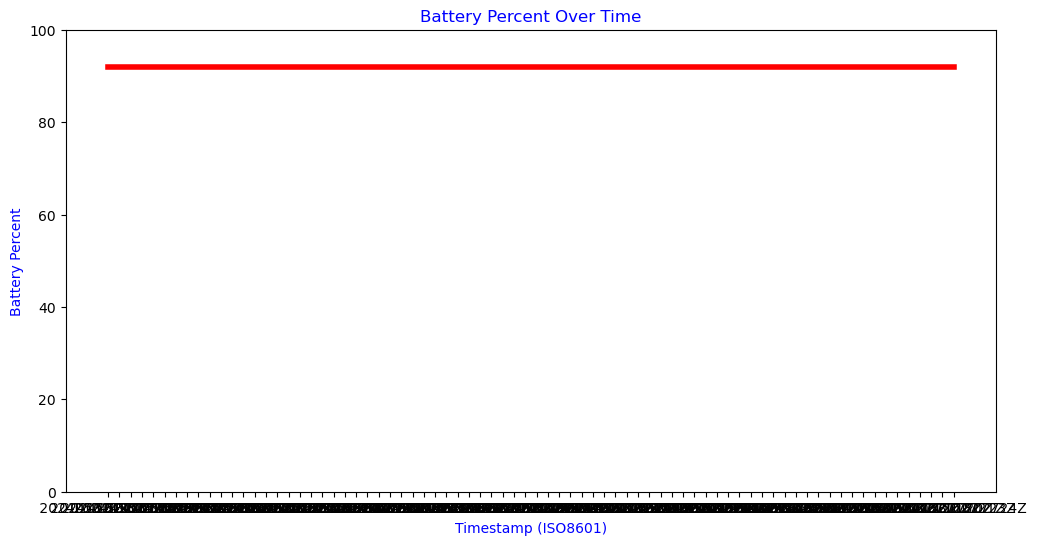

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp_iso8601'], df['battery_percent'], linewidth=4, color='red')
plt.ylim(0,100)
plt.xlabel('Timestamp (ISO8601)', color='blue')
plt.ylabel('Battery Percent', color='blue')
plt.title('Battery Percent Over Time', color='blue')
#plt.grid()

plt.show()


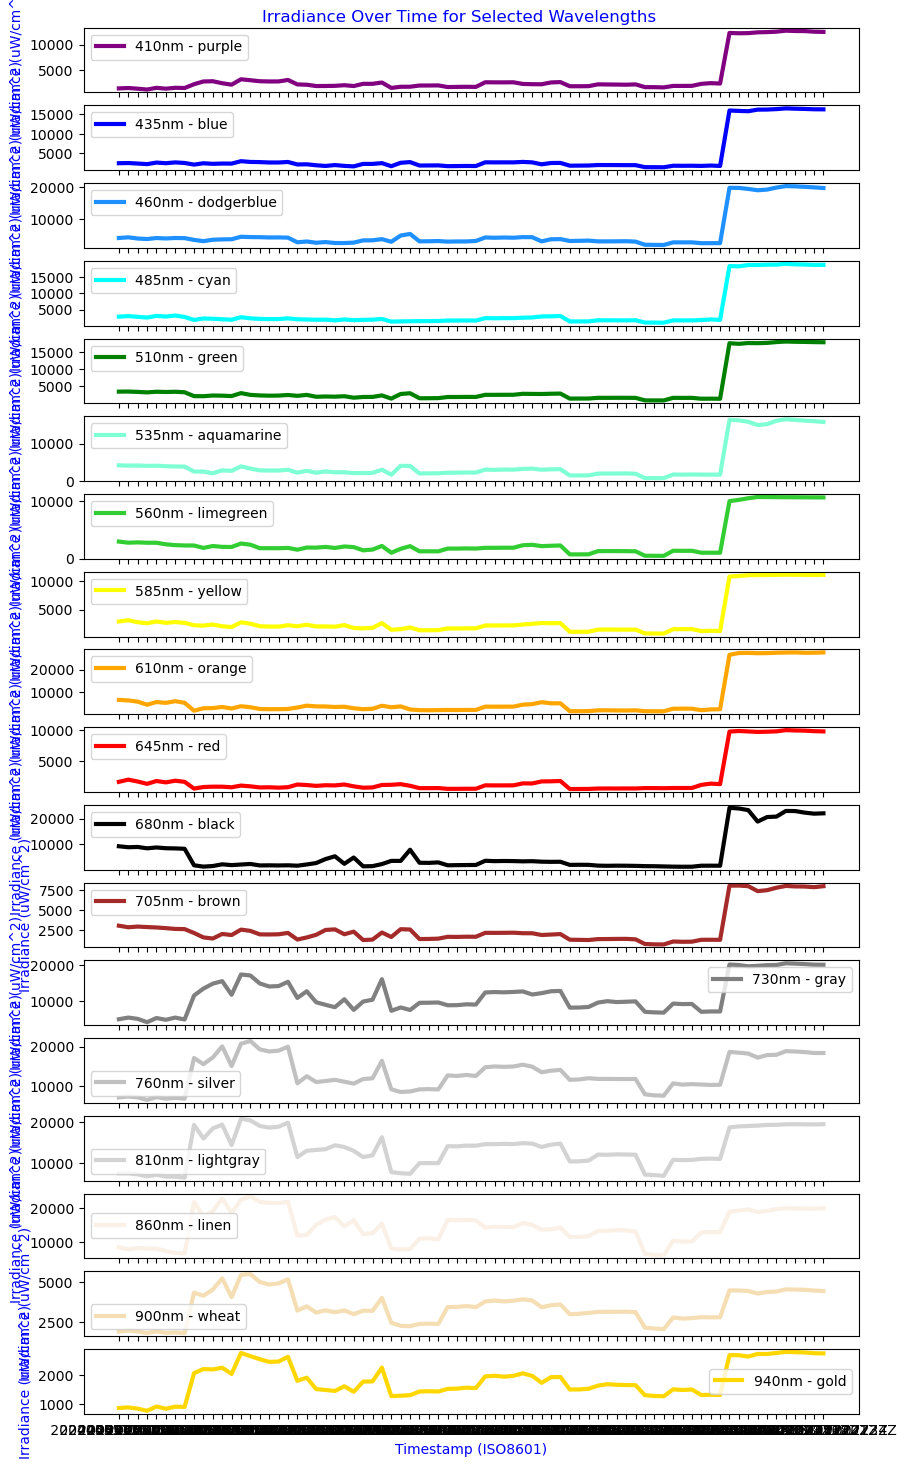

In [7]:
# List of wavelengths for plotting
#wavelengths_to_plot = [410, 435, 450, 485, 510, 535, 560, 585, 610, 645, 680]
wavelengths_to_plot= [410, 435, 460, 485, 510, 535, 560, 585, 610, 645, 680, 705, 730, 760, 810, 860, 900, 940]

# Create subplots
fig, axs = plt.subplots(len(wavelengths_to_plot), 1, figsize=(10, 1 * len(wavelengths_to_plot)), sharex=True)

# Loop through each wavelength and plot the data
for i, wavelength in enumerate(wavelengths_to_plot):
    # Use regex to match column names containing the wavelength
    wavelength_pattern = f'{wavelength}nm_(.*?)_irradiance_uW_per_cm_squared'
    wavelength_columns = [col for col in df.columns if re.search(wavelength_pattern, col)]

    # Plot the data for each matched column
    for column in wavelength_columns:
        color = re.search(wavelength_pattern, column).group(1)
        axs[i].plot(df['timestamp_iso8601'], df[column], label=f'{wavelength}nm - {color}',color=color,linewidth=3)

    axs[i].set_ylabel('Irradiance (uW/cm^2)', color='blue')
    #axs[i].set_ylim(0,1)

    axs[i].legend()

# Set common xlabel and title
plt.xlabel('Timestamp (ISO8601)', color='blue')
plt.suptitle('Irradiance Over Time for Selected Wavelengths', y=0.89, color='blue')
#plt.grid()


# Show the plot
plt.show()


In [8]:
from ipywidgets import interact, FloatRangeSlider, Layout


# Extract all unique wavelengths
wavelengths = sorted(set(re.findall(r'(\d+)nm_', ' '.join(df.columns))))


def update_plot(timestamp_index):
    plt.figure(figsize=(12, 6))

    timestamp = df['timestamp_iso8601'][timestamp_index]
    test = df['Test'][timestamp_index]

    for wavelength in wavelengths:
        wavelength_pattern = f'{wavelength}nm_(.*?)_irradiance_uW_per_cm_squared'
        wavelength_columns = [col for col in df.columns if re.search(wavelength_pattern, col)]

        for column in wavelength_columns:
            color = 'black'  # Default color for wavelengths not explicitly defined

            # Define specific colors for certain wavelengths
            if wavelength == '410':
                color = 'purple'
            elif wavelength == '435':
                color = 'blue'
            elif wavelength == '460':
                color = 'dodgerblue'
            elif wavelength == '485':
                color = 'cyan'
            elif wavelength == '510':
                color = 'green'
            elif wavelength == '535':
                color = 'aquamarine'
            elif wavelength == '560':
                color = 'limegreen'
            elif wavelength == '585':
                color = 'yellow'
            elif wavelength == '610':
                color = 'orange'
            elif wavelength == '645':
                color = 'red'
            elif wavelength == '680':
                color = 'black'
            elif wavelength == '705':
                color = 'brown'
            elif wavelength == '730':
                color = 'gray'
            elif wavelength == '760':
                color = 'silver'
            elif wavelength == '810':
                color = 'lightgray'
            elif wavelength == '860':
                color = 'linen'
            elif wavelength == '900':
                color = 'wheat'
            elif wavelength == '940':
                color = 'gold'

            # Map custom colors to standard recognized color names
            # color = map_color(color)

            # Check if the column exists before using it
            if f'irradiance_{wavelength}nm_{color}_wavelength_nm' in df.columns and f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared' in df.columns:
                wavelength_data = df[f'irradiance_{wavelength}nm_{color}_wavelength_nm'][timestamp_index]
                irradiance_data = df[f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared'][timestamp_index]
                wavelength_uncertainty = df[f'irradiance_{wavelength}nm_{color}_wavelength_uncertainty_nm'][timestamp_index]
                irradiance_uncertainty = df[f'irradiance_{wavelength}nm_{color}_irradiance_uncertainty_uW_per_cm_squared'][timestamp_index]

                # Create a Gaussian distribution
                x_values = np.linspace(wavelength_data - 3 * wavelength_uncertainty,
                                       wavelength_data + 3 * wavelength_uncertainty, 100)
                y_values = irradiance_data * np.exp(-0.5 * ((x_values - wavelength_data) / wavelength_uncertainty) ** 2)

                # Plot Gaussian distribution
                plt.plot(x_values, y_values, label=f'{wavelength}nm - {color}', linestyle='--', linewidth=2, color=color)

                # Plot data point with error bars
                plt.errorbar(wavelength_data, irradiance_data, xerr=wavelength_uncertainty, yerr=irradiance_uncertainty,
                             linestyle='', marker='o', markersize=5, capsize=5, color=color)

                  
   # Add background colors with low alpha
    plt.axvspan(300, 450, alpha=0.5, color='violet',label='Near UV from 380-450m')
    plt.axvspan(450, 495, alpha=0.2, color='blue',label='Blue from 450-495nm')
    plt.axvspan(495, 570, alpha=0.2, color='green',label='Green from 495-570nm')
    plt.axvspan(570, 590, alpha=0.2, color='yellow',label='Yellow from 570-590nm')
    plt.axvspan(590, 620, alpha=0.2, color='orange',label='Orange from 590-620nm')
    plt.axvspan(620, 750, alpha=0.2, color='red',label='Red from 620-750nm')
    plt.axvspan(750, 1000, alpha=1, color='lavender',label='Near IR from 700-1,000nm')


    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Irradiance (uW/cm^2)')
    plt.xlim(350,1000)
    #plt.ylim(0,30000)
    #plt.ylim(0,30)    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid()
    #plt.title(f'Irradiance Over Wavelength by Timestamp {timestamp_index} and Batch {batch_index} for Backyard')
    #plt.title(f"Irradiance Over Wavelength by Timestamp Index {timestamp_index}: \n \n Test Pattern {grass['Test']} for Backyard")
    #plt.title(f"Raw Irradiance Over Wavelength by Pattern Type: {test} \n \n Test Pattern {grass['Test']} for Backyard")
    plt.title(f"Raw Readings Irradiance Over Wavelength by Pattern Type: {test} ")
    plt.show()


timestamp_slider = widgets.IntSlider(value=0, min=0, max=len(df) - 1, step=1, description='Timestamp Index',layout=Layout(width='90%'))
batch_slider = widgets.IntSlider(value=0, min=0, max=20, step=1, description='Batch Index')

# Create an interactive plot using widgets.interactive
interactive_plot = widgets.interactive(update_plot, timestamp_index=timestamp_slider, batch_index=batch_slider)

# Display the interactive plot
display(interactive_plot)


interactive(children=(IntSlider(value=0, description='Timestamp Index', layout=Layout(width='90%'), max=75), O…

## Line-Plot of raw Spectral Data:

In [9]:
def update_plot(timestamp_index):
    plt.figure(figsize=(12, 6))

    timestamp = timestamp_index
    test = df['Test'][timestamp_index]

    wavelength_data_list = []
    irradiance_data_list = []
    
    for wavelength in wavelengths:
        wavelength_pattern = f'{wavelength}nm_(.*?)_irradiance_uW_per_cm_squared'
        wavelength_columns = [col for col in df.columns if re.search(wavelength_pattern, col)]

        for column in wavelength_columns:
            color = 'black'  # Default color for wavelengths not explicitly defined

            # Check if the column exists before using it
            if column in df.columns:
                # Extract wavelength data
                wavelength_data_str = wavelength
                try:
                    wavelength_data = int(wavelength_data_str)  # Convert string to integer
                except ValueError:
                    try:
                        wavelength_data = float(wavelength_data_str)  # Convert string to float
                    except ValueError:
                        continue  # Skip if wavelength cannot be converted to int or float

                # Append data to lists
                wavelength_data_list.append(wavelength_data)
                irradiance_data_list.append(df[column][timestamp_index])
                
    # Plot data points
    plt.plot(wavelength_data_list, irradiance_data_list, linestyle='dotted', marker = 'o',markersize = 5, markeredgecolor = 'blue', mfc = 'blue', linewidth = 3,color='red')

   # Add background colors with low alpha
    plt.axvspan(300, 450, alpha=0.5, color='violet',label='Near UV from 380-450m')
    plt.axvspan(450, 495, alpha=0.2, color='blue',label='Blue from 450-495nm')
    plt.axvspan(495, 570, alpha=0.2, color='green',label='Green from 495-570nm')
    plt.axvspan(570, 590, alpha=0.2, color='yellow',label='Yellow from 570-590nm')
    plt.axvspan(590, 620, alpha=0.2, color='orange',label='Orange from 590-620nm')
    plt.axvspan(620, 750, alpha=0.2, color='red',label='Red from 620-750nm')
    plt.axvspan(750, 1000, alpha=1, color='lavender',label='Near IR from 700-1,000nm')
           
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Irradiance (uW/cm^2)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlim(350,1000)
    #plt.ylim(0,14000)    
    plt.grid()
    plt.title(f"Raw Readings Irradiance Over Wavelength by Test Pattern {test}")

    plt.show()
    
    
# Create a slider widget
timestamp_slider = widgets.IntSlider(value=0, min=0, max=len(df) - 1, step=1, description='Timestamp Index',layout=Layout(width='99%'))




# Create an interactive plot using widgets.interactive
interactive_plot = widgets.interactive(update_plot, timestamp_index=timestamp_slider)

# Display the interactive plot
display(interactive_plot)


interactive(children=(IntSlider(value=0, description='Timestamp Index', layout=Layout(width='99%'), max=75), O…

## Plot bewtween a Sample Range:

In [10]:
def update_plot(timestamp_range):
    plt.figure(figsize=(12, 6))

    start_timestamp_index, end_timestamp_index = timestamp_range
    test = df['Test'][start_timestamp_index]
    testb = df['Test'][start_timestamp_index]
    teste = df['Test'][end_timestamp_index]

    # Loop over the range of timestamp indices
    for timestamp_index in range(start_timestamp_index, end_timestamp_index + 1):
        wavelength_data_list = []
        irradiance_data_list = []

        for wavelength in wavelengths:
            wavelength_pattern = f'{wavelength}nm_(.*?)_irradiance_uW_per_cm_squared'
            wavelength_columns = [col for col in df.columns if re.search(wavelength_pattern, col)]

            for column in wavelength_columns:
                color = 'black'  # Default color for wavelengths not explicitly defined

                # Check if the column exists before using it
                if column in df.columns:
                    # Extract wavelength data
                    wavelength_data_str = wavelength
                    try:
                        wavelength_data = int(wavelength_data_str)  # Convert string to integer
                    except ValueError:
                        try:
                            wavelength_data = float(wavelength_data_str)  # Convert string to float
                        except ValueError:
                            continue  # Skip if wavelength cannot be converted to int or float

                    # Append data to lists
                    wavelength_data_list.append(wavelength_data)
                    irradiance_data_list.append(df[column][timestamp_index])

        # Plot data points
        plt.plot(wavelength_data_list, irradiance_data_list, linestyle='dotted', marker='o', markersize=5, markeredgecolor='blue', mfc='blue', linewidth=2, color='red')

    # Add background colors with low alpha
    plt.axvspan(300, 450, alpha=0.5, color='violet',label='Near UV from 380-450m')
    plt.axvspan(450, 495, alpha=0.2, color='blue',label='Blue from 450-495nm')
    plt.axvspan(495, 570, alpha=0.2, color='green',label='Green from 495-570nm')
    plt.axvspan(570, 590, alpha=0.2, color='yellow',label='Yellow from 570-590nm')
    plt.axvspan(590, 620, alpha=0.2, color='orange',label='Orange from 590-620nm')
    plt.axvspan(620, 750, alpha=0.2, color='red',label='Red from 620-750nm')
    plt.axvspan(750, 1000, alpha=1, color='lavender',label='Near IR from 700-1,000nm')

    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Irradiance (uW/cm^2)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlim(350,1000)
    plt.ylim(0,30000)
    plt.grid()
    #plt.title(f"Raw Readings Irradiance Over Wavelength by Pattern Type: {test} \n \n Test Pattern {df['Test']}")
    plt.title(f"Raw Readings Irradiance Over Wavelength by Pattern Type: {testb} - to -{teste}")
    plt.show()
 
# Create a range slider widget for timestamp indices
timestamp_range_slider = widgets.IntRangeSlider(value=(0, len(df) - 1), min=0, max=len(df) - 1, step=1, description='Timestamp Range', layout=Layout(width='90%'))

# Create an interactive plot using widgets.interactive
interactive_plot = widgets.interactive(update_plot, timestamp_range=timestamp_range_slider)

# Display the interactive plot
display(interactive_plot)


interactive(children=(IntRangeSlider(value=(0, 75), description='Timestamp Range', layout=Layout(width='90%'),…

---
---
# **Now we will apply White Card Normalization to our data per recommendations from Paul Mirel.**
---

## Load White Standard data taken in same lighting conditions:

### Email from Paul Mirel of NASA, February 5, 2024: 
    It’s general practice to measure a white reference in the same illumination as the sample, and then to measure the sample. The unitless reflectance from the sample is then the sample signal divided by the white reference signal, in each wavelength. Landsat uses a stretch of desert sand, or a huge white tarp!, as a reference. Spectralon is the material of choice for white references, but it’s expensive. We get quite good results with ordinary white Styrofoam (without cover sheets), and are considering using white playground sand, or a plain white felt acrylic blanket. The goal is a material that scatters light equally in all directions, and does not have much, or any, specular shiny reflectance.

## Read in White Card from full-sun normailzation

## The following is a single white card full sun reading, but was taken from the average of all of the full sun white card readings taken in this test.

In [11]:
#read the file
file = r'data_Nick_HomeDepot_white.xlsx'
white = pd.read_excel(file,index_col=False)

# Remove leading/trailing whitespaces in column names
white.columns = white.columns.str.strip()
white.head()

device_type software_version   UID        Test  batch  weekday  \
0   STELLA-Q2            2.4.0  6858  White Card     17   Friday   
1   STELLA-Q2            2.4.0  6858  White Card     17   Friday   
2   STELLA-Q2            2.4.0  6858  White Card     17   Friday   
3   STELLA-Q2            2.4.0  6858  White Card     17   Friday   
4   STELLA-Q2            2.4.0  6858  White Card     17   Friday   

   timestamp_iso8601  decimal_hour  bandwidth_FWHM_nm  field_of_view_FWHM_DEG  \
0   20240531T202709Z       20.4525                 20                      20   
1   20240531T202710Z       20.4528                 20                      20   
2   20240531T202712Z       20.4533                 20                      20   
3   20240531T202713Z       20.4536                 20                      20   
4   20240531T202715Z       20.4542                 20                      20   

   ...  irradiance_900nm_wheat_wavelength_nm  \
0  ...                                   900   
1  ...                                   900   
2  ...                                   900   
3  ...                                   900   
4  ...                                   900   

   irradiance_900nm_wheat_wavelength_uncertainty_nm  \
0                                                10   
1                                                10   
2                                                10   
3                                                10   
4                                                10   

   irradiance_900nm_wheat_irradiance_uW_per_cm_squared  \
0                                            4506.57     
1                                            4498.24     
2                                            4467.12     
3                                            4308.75     
4                                            4404.33     

   irradiance_900nm_wheat_irradiance_uncertainty_uW_per_cm_squared  \
0                                            540.789                 
1                                            539.789                 
2                                            536.054                 
3                                            517.050                 
4                                            528.519                 

   irradiance_940nm_gold_wavelength_nm  \
0                                  940   
1                                  940   
2                                  940   
3                                  940   
4                                  940   

   irradiance_940nm_gold_wavelength_uncertainty_nm  \
0                                               10   
1                                               10   
2                                               10   
3                                               10   
4                                               10   

   irradiance_940nm_gold_irradiance_uW_per_cm_squared  \
0                                            2669.11    
1                                            2666.46    
2                                            2622.35    
3                                            2710.58    
4                                            2708.82    

   irradiance_940nm_gold_irradiance_uncertainty_uW_per_cm_squared  \
0                                            320.293                
1                                            319.976                
2                                            314.682                
3                                            325.270                
4                                            325.058                

   battery_voltage  battery_percent  
0             4.12               92  
1             4.12               92  
2             4.11               92  
3             4.11               92  
4             4.12               92  

[5 rows x 84 columns]

## White and Gray Card Readings within Range:

In [12]:
def update_plot(timestamp_range):
    plt.figure(figsize=(12, 6))

    start_timestamp_index, end_timestamp_index = timestamp_range
    testb = white['Test'][start_timestamp_index]
    teste = white['Test'][end_timestamp_index]

    # Loop over the range of timestamp indices
    for timestamp_index in range(start_timestamp_index, end_timestamp_index + 1):
        wavelength_data_list = []
        irradiance_data_list = []

        for wavelength in wavelengths:
            wavelength_pattern = f'{wavelength}nm_(.*?)_irradiance_uW_per_cm_squared'
            wavelength_columns = [col for col in white.columns if re.search(wavelength_pattern, col)]

            for column in wavelength_columns:
                color = 'black'  # Default color for wavelengths not explicitly defined

                # Check if the column exists before using it
                if column in white.columns:
                    # Extract wavelength data
                    wavelength_data_str = wavelength
                    try:
                        wavelength_data = int(wavelength_data_str)  # Convert string to integer
                    except ValueError:
                        try:
                            wavelength_data = float(wavelength_data_str)  # Convert string to float
                        except ValueError:
                            continue  # Skip if wavelength cannot be converted to int or float

                    # Append data to lists
                    wavelength_data_list.append(wavelength_data)
                    irradiance_data_list.append(white[column][timestamp_index])

        # Plot data points
        plt.plot(wavelength_data_list, irradiance_data_list, linestyle='dotted', marker='o', markersize=5, markeredgecolor='blue', mfc='blue', linewidth=2, color='red')

    # Add background colors with low alpha
    plt.axvspan(300, 450, alpha=0.5, color='violet',label='Near UV from 380-450m')
    plt.axvspan(450, 495, alpha=0.2, color='blue',label='Blue from 450-495nm')
    plt.axvspan(495, 570, alpha=0.2, color='green',label='Green from 495-570nm')
    plt.axvspan(570, 590, alpha=0.2, color='yellow',label='Yellow from 570-590nm')
    plt.axvspan(590, 620, alpha=0.2, color='orange',label='Orange from 590-620nm')
    plt.axvspan(620, 750, alpha=0.2, color='red',label='Red from 620-750nm')
    plt.axvspan(750, 1000, alpha=1, color='lavender',label='Near IR from 700-1,000nm')

    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Irradiance (uW/cm^2)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlim(350,1000)
    plt.ylim(0,30000)
    plt.grid()
    #plt.title(f"Raw Readings Irradiance Over Wavelength by Pattern Type: {test} \n \n Test Pattern {df['Test']}")
    plt.title(f"White and Gray Card Readings Irradiance Over Wavelength by Pattern Type: {testb} - to -{teste}")
    plt.show()
 
# Create a range slider widget for timestamp indices
timestamp_range_slider = widgets.IntRangeSlider(value=(0, len(white) - 1), min=0, max=len(white) - 1, step=1, description='Timestamp Range', layout=Layout(width='90%'))

# Create an interactive plot using widgets.interactive
interactive_plot = widgets.interactive(update_plot, timestamp_range=timestamp_range_slider)

# Display the interactive plot
display(interactive_plot)


interactive(children=(IntRangeSlider(value=(0, 10), description='Timestamp Range', layout=Layout(width='90%'),…

**In the above plot for our white standard, there is quite a range of magnitudes across what should be a uniform specrtum. This could be instrument bias.**

---
---
# **White Card Correct all STELLA-Q2 Readings to the average of the White Card Readings.**

## Calculate Scaling Factor per Wavelength:

In [13]:
# Extract the white standard readings from the DataFrame

# Initialize white_standard_readings as an empty dictionary
white_standard_readings = {}


# Extract all unique wavelengths
wavelengths = sorted(set(re.findall(r'(\d+)nm_', ' '.join(white.columns))))

timestamp = white['timestamp_iso8601'][0]

for wavelength in wavelengths:
    wavelength_pattern = f'{wavelength}nm_(.*?)_irradiance_uW_per_cm_squared'
    wavelength_columns = [col for col in white.columns if re.search(wavelength_pattern, col)]

    for column in wavelength_columns:
        color = 'black'  # Default color for wavelengths not explicitly defined

        # Define specific colors for certain wavelengths
        if wavelength == '410':
            color = 'purple'
        elif wavelength == '435':
            color = 'blue'
        elif wavelength == '460':
            color = 'dodgerblue'
        elif wavelength == '485':
            color = 'cyan'
        elif wavelength == '510':
            color = 'green'
        elif wavelength == '535':
            color = 'aquamarine'
        elif wavelength == '560':
            color = 'limegreen'
        elif wavelength == '585':
            color = 'yellow'
        elif wavelength == '610':
            color = 'orange'
        elif wavelength == '645':
            color = 'red'
        elif wavelength == '680':
            color = 'black'
        elif wavelength == '705':
            color = 'brown'
        elif wavelength == '730':
            color = 'gray'
        elif wavelength == '760':
            color = 'silver'
        elif wavelength == '810':
            color = 'lightgray'
        elif wavelength == '860':
            color = 'linen'
        elif wavelength == '900':
            color = 'wheat'
        elif wavelength == '940':
            color = 'gold'

        # Map custom colors to standard recognized color names
        # color = map_color(color)

        # Check if the column exists before using it
        if f'irradiance_{wavelength}nm_{color}_wavelength_nm' in white.columns and f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared' in white.columns:
            #wavelength_data = white[f'irradiance_{wavelength}nm_{color}_wavelength_nm'][0]
            #irradiance_data = white[f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared'][0]
            white_reading = white[f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared'][0]
            white_standard_readings[wavelength] = white_reading
            
    #print()
    #print('1) This is the raw white card readings from our white card calibration:',white_reading, 'at', wavelength,'nm.')
  
    #print()
    #print('2) These are our white card standard wavelengths and readings from our spectrometer:',white_standard_readings,'used with wavelength', wavelength,'nm.')


scaling_factor_save = []
# Calculate scaling factors using only white standard readings
scaling_factors = {}
for wavelength, white_reading in white_standard_readings.items():
    # Assuming the minimum possible reading is zero
    scaling_factor = 1.0 / white_reading
    scaling_factors[wavelength] = scaling_factor
    scaling_factor_save.append(scaling_factor)

print('scaling_factor_save:',scaling_factor_save)    
    
#print()
#print('3) These are our wavelengths and white scaling factors:',scaling_factors)

# Print scaling factors

k=0
print()
print("Scaling Factors:")
for wavelength, factor in scaling_factors.items():
    print(f"4) These are our final wavelength and scaling factors per wavelength {wavelength}nm: {factor} \tline {k}")
    k=k+1

    
#print([scaling_factors[factor] for wavelength in wavelengths])    

scaling_factor_save: [8.170468658082227e-05, 6.245042997121034e-05, 5.0300292747703794e-05, 5.439956480348157e-05, 5.678849692206347e-05, 6.097523795586613e-05, 9.950149749753733e-05, 9.23412192734593e-05, 3.750979943510242e-05, 0.00010291326881357467, 4.137052267518348e-05, 0.00012445349359624548, 4.98671041673939e-05, 5.361786547277553e-05, 5.335325188070213e-05, 5.310251440405703e-05, 0.00022189825077608915, 0.00037465672077958566]

Scaling Factors:
4) These are our final wavelength and scaling factors per wavelength 410nm: 8.170468658082227e-05 	line 0
4) These are our final wavelength and scaling factors per wavelength 435nm: 6.245042997121034e-05 	line 1
4) These are our final wavelength and scaling factors per wavelength 460nm: 5.0300292747703794e-05 	line 2
4) These are our final wavelength and scaling factors per wavelength 485nm: 5.439956480348157e-05 	line 3
4) These are our final wavelength and scaling factors per wavelength 510nm: 5.678849692206347e-05 	line 4
4) These are

## White Card Corrected Spectral Data Displayed as Gaussian points with Error for Individual Readings:

In [14]:
# Extract all unique wavelengths
wavelengths = sorted(set(re.findall(r'(\d+)nm_', ' '.join(df.columns))))

def update_plot(timestamp_index):
    plt.figure(figsize=(12, 6))

    timestamp = df['timestamp_iso8601'][timestamp_index]
    test = df['Test'][timestamp_index]

    for wavelength in wavelengths:
        wavelength_pattern = f'{wavelength}nm_(.*?)_irradiance_uW_per_cm_squared'
        wavelength_columns = [col for col in df.columns if re.search(wavelength_pattern, col)]

        for column in wavelength_columns:
            color = 'black'  # Default color for wavelengths not explicitly defined

        # Define specific colors for certain wavelengths
            if wavelength == '410':
                color = 'purple'
            elif wavelength == '435':
                color = 'blue'
            elif wavelength == '460':
                color = 'dodgerblue'
            elif wavelength == '485':
                color = 'cyan'
            elif wavelength == '510':
                color = 'green'
            elif wavelength == '535':
                color = 'aquamarine'
            elif wavelength == '560':
                color = 'limegreen'
            elif wavelength == '585':
                color = 'yellow'
            elif wavelength == '610':
                color = 'orange'
            elif wavelength == '645':
                color = 'red'
            elif wavelength == '680':
                color = 'black'
            elif wavelength == '705':
                color = 'brown'
            elif wavelength == '730':
                color = 'gray'
            elif wavelength == '760':
                color = 'silver'
            elif wavelength == '810':
                color = 'lightgray'
            elif wavelength == '860':
                color = 'linen'
            elif wavelength == '900':
                color = 'wheat'
            elif wavelength == '940':
                color = 'gold'

            # Check if the column exists before using it
            if f'irradiance_{wavelength}nm_{color}_wavelength_nm' in df.columns and f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared' in df.columns:
                wavelength_data = df[f'irradiance_{wavelength}nm_{color}_wavelength_nm'][timestamp_index]
                irradiance_data = df[f'irradiance_{wavelength}nm_{color}_irradiance_uW_per_cm_squared'][timestamp_index]
                wavelength_uncertainty = df[f'irradiance_{wavelength}nm_{color}_wavelength_uncertainty_nm'][timestamp_index]
                irradiance_uncertainty = df[f'irradiance_{wavelength}nm_{color}_irradiance_uncertainty_uW_per_cm_squared'][timestamp_index]

                # Apply scaling factor to correct irradiance data
                scaling_factor = scaling_factors[wavelength]
                #print(scaling_factor)
                corrected_irradiance_data = irradiance_data * scaling_factor

                
                # Create a Gaussian distribution
                x_values = np.linspace(wavelength_data - 3 * wavelength_uncertainty,
                                       wavelength_data + 3 * wavelength_uncertainty, 100)
                y_values = corrected_irradiance_data * np.exp(-0.5 * ((x_values - wavelength_data) / wavelength_uncertainty) ** 2)

                # Plot Gaussian distribution
                plt.plot(x_values, y_values, label=f'{wavelength}nm - {color}', linestyle='--', linewidth=2, color=color)

                # Plot data point with error bars
                #plt.errorbar(wavelength_data, corrected_irradiance_data, xerr=wavelength_uncertainty, yerr=irradiance_uncertainty,
                #             linestyle='', marker='o', markersize=5, capsize=5, color=color)
                plt.errorbar(wavelength_data, corrected_irradiance_data, xerr=wavelength_uncertainty, yerr=irradiance_uncertainty*scaling_factor,
                              linestyle='', marker='o', markersize=5, capsize=5, color=color)

                
                
                
                # Plot data point with error bars (same as before)
                  
   # Add background colors with low alpha
    plt.axvspan(300, 450, alpha=0.5, color='violet',label='Near UV from 380-450m')
    plt.axvspan(450, 495, alpha=0.2, color='blue',label='Blue from 450-495nm')
    plt.axvspan(495, 570, alpha=0.2, color='green',label='Green from 495-570nm')
    plt.axvspan(570, 590, alpha=0.2, color='yellow',label='Yellow from 570-590nm')
    plt.axvspan(590, 620, alpha=0.2, color='orange',label='Orange from 590-620nm')
    plt.axvspan(620, 750, alpha=0.2, color='red',label='Red from 620-750nm')
    plt.axvspan(750, 1000, alpha=1, color='lavender',label='Near IR from 700-1,000nm')




    # Display the plot
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Corrected Irradiance (uW/cm^2)')  # Updated ylabel to reflect correction
    plt.xlim(350,1000)
    plt.ylim(0,1)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid()
    #plt.title(f'Corrected Irradiance Over Wavelength by Timestamp {timestamp} and Batch {batch_index} for Backyard')
    plt.title(f"Corrected Irradiance Over Wavelength by Pattern Type: {test}")
    plt.show()



                  

timestamp_slider = widgets.IntSlider(value=0, min=0, max=len(df) - 1, step=1, description='Timestamp Index', layout=Layout(width='90%'))
batch_slider = widgets.IntSlider(value=0, min=0, max=20, step=1, description='Batch Index')

# Create an interactive plot using widgets.interactive
interactive_plot = widgets.interactive(update_plot, timestamp_index=timestamp_slider, batch_index=batch_slider)

# Display the interactive plot
display(interactive_plot)


interactive(children=(IntSlider(value=0, description='Timestamp Index', layout=Layout(width='90%'), max=75), O…

## White Card Corrected Spectral Data Over a Range of Readings:

In [15]:
def update_plot(timestamp_range):
    plt.figure(figsize=(12, 6))

    start_timestamp_index, end_timestamp_index = timestamp_range
    test = df['Test'][start_timestamp_index]
    testb = df['Test'][start_timestamp_index]
    teste = df['Test'][end_timestamp_index]

    # Loop over the range of timestamp indices
    for timestamp_index in range(start_timestamp_index, end_timestamp_index + 1):
        wavelength_data_list = []
        irradiance_data_list = []

        for wavelength in wavelengths:
            wavelength_pattern = f'{wavelength}nm_(.*?)_irradiance_uW_per_cm_squared'
            wavelength_columns = [col for col in df.columns if re.search(wavelength_pattern, col)]
            
            
            
            # Apply scaling factor to correct irradiance data
            scaling_factor = scaling_factors[wavelength]
            #print(scaling_factor)
            #corrected_irradiance_data = irradiance_data * scaling_factor

            
            for column in wavelength_columns:
                color = 'black'  # Default color for wavelengths not explicitly defined

                # Check if the column exists before using it
                if column in df.columns:
                    # Extract wavelength data
                    wavelength_data_str = wavelength
                    try:
                        wavelength_data = int(wavelength_data_str)  # Convert string to integer
                    except ValueError:
                        try:
                            wavelength_data = float(wavelength_data_str)  # Convert string to float
                        except ValueError:
                            continue  # Skip if wavelength cannot be converted to int or float

                    # Append data to lists
                    wavelength_data_list.append(wavelength_data)
                    irradiance_data_list.append(df[column][timestamp_index]* scaling_factor)

        # Plot data points
        plt.plot(wavelength_data_list, irradiance_data_list, linestyle='dotted', marker='o', markersize=5, markeredgecolor='blue', mfc='blue', linewidth=2, color='red')

    # Add background colors with low alpha
    plt.axvspan(300, 450, alpha=0.5, color='violet',label='Near UV from 380-450m')
    plt.axvspan(450, 495, alpha=0.2, color='blue',label='Blue from 450-495nm')
    plt.axvspan(495, 570, alpha=0.2, color='green',label='Green from 495-570nm')
    plt.axvspan(570, 590, alpha=0.2, color='yellow',label='Yellow from 570-590nm')
    plt.axvspan(590, 620, alpha=0.2, color='orange',label='Orange from 590-620nm')
    plt.axvspan(620, 750, alpha=0.2, color='red',label='Red from 620-750nm')
    plt.axvspan(750, 1000, alpha=1, color='lavender',label='Near IR from 700-1,000nm')

    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Irradiance (uW/cm^2)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlim(350,1000)
    plt.ylim(0,1.2)
    plt.grid()
    #plt.title(f"Raw Readings Irradiance Over Wavelength by Pattern Type: {test} \n \n Test Pattern {df['Test']}")
    plt.title(f"Corrected Readings Irradiance Over Wavelength by Pattern Type: {testb} - to -{teste}")
    plt.show()
 
# Create a range slider widget for timestamp indices
timestamp_range_slider = widgets.IntRangeSlider(value=(0, len(df) - 1), min=0, max=len(df) - 1, step=1, description='Timestamp Range', layout=Layout(width='90%'))

# Create an interactive plot using widgets.interactive
interactive_plot = widgets.interactive(update_plot, timestamp_range=timestamp_range_slider)

# Display the interactive plot
display(interactive_plot)


interactive(children=(IntRangeSlider(value=(0, 75), description='Timestamp Range', layout=Layout(width='90%'),…

---
# **Can We use the average data for each Vegetative Species to Predict Each Species from STELLA Spectrometer data?**
---



# **Define this example Test Patterns by Color and Names in the cell below:**
---
**This is Test Case specific for your data.**

In [16]:



# These are all of the Test Pattern Names
ndvi_names = [ 'Palm',
              'Broad Leaf', 
              'Piney' , 
              'Big Leaf',
              'Coral' , 
              'Piny Green',
              'More Green Plant', 
              'Green Plant', 
              'Yellow Shrub', 
              'Red Broad Leaf', 
              'Vgreen', 
              'Red Plant', 
              'Leafy',
              'Pink Flower',
              'White Card']



# Define Name and Colors for each unique value in the 'Test' column
test_colors = { 
            'Palm':'limegreen',
            'Broad Leaf':'aquamarine',
            'Piney':'lawngreen', 
            'Big Leaf':'darkgreen',
            'Coral':'magenta',
            'Piny Green':'olive',
            'More Green Plant':'green',
            'Green Plant':'seagreen',
            'Yellow Shrub':'yellow',
            'Red Broad Leaf':'red',
            'Vgreen':'lime',
            'Red Plant':'deeppink',
            'Leafy':'yellowgreen',
            'Pink Flower':'pink',
            'White Card':'silver'
            } 


# This is for Knn most frequent choice 
# Get the test pattern names right from your STELLA data
def which_is_most_frequent(List):
    #print(most_frequent(List)) 
    if most_frequent(List) == 1: 
        test_pattern_knn.append('Palm')
    elif most_frequent(List) == 2: 
        test_pattern_knn.append('Broad Leaf')
    elif most_frequent(List) == 3:
        test_pattern_knn.append('Piney')
    elif most_frequent(List) == 4: 
        test_pattern_knn.append('Big Leaf')
    elif most_frequent(List) == 5:
        test_pattern_knn.append('Coral')
    elif most_frequent(List) == 6: 
        test_pattern_knn.append('Piny Green')
    elif most_frequent(List) == 7:
        test_pattern_knn.append('More Green Plant')
    elif most_frequent(List) == 8: 
        test_pattern_knn.append('Green Plant')
    elif most_frequent(List) == 9:
        test_pattern_knn.append('Yellow Shrub')
    elif most_frequent(List) == 10: 
        test_pattern_knn.append('Red Broad Leaf')
    elif most_frequent(List) == 11:
        test_pattern_knn.append('Vgreen')
    elif most_frequent(List) == 12: 
        test_pattern_knn.append('Red Plant')
    elif most_frequent(List) == 13:
        test_pattern_knn.append('Leafy')
    elif most_frequent(List) == 14: 
        test_pattern_knn.append('Pink Flower')
    elif most_frequent(List) == 15:
        test_pattern_knn.append('White Card')



In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ipywidgets import widgets, Layout


def update_plot(timestamp_range):
    plt.figure(figsize=(12, 6))

    start_timestamp_index, end_timestamp_index = timestamp_range
    test = df['Test'][start_timestamp_index]
    testb = df['Test'][start_timestamp_index]
    teste = df['Test'][end_timestamp_index]
    #clustb = df['Cluster'][start_timestamp_index]
    #cluste = df['Cluster'][end_timestamp_index]

    # Loop over the range of timestamp indices
    for timestamp_index in range(start_timestamp_index, end_timestamp_index + 1):
        wavelength_data_list = []
        irradiance_data_list = []

        for wavelength in wavelengths:
            wavelength_pattern = f'{wavelength}nm_(.*?)_irradiance_uW_per_cm_squared'
            wavelength_columns = [col for col in df.columns if re.search(wavelength_pattern, col)]
            
            # Apply scaling factor to correct irradiance data
            scaling_factor = scaling_factors[wavelength]
            
            for column in wavelength_columns:
                color = test_colors[df['Test'][timestamp_index]]  # Get color based on 'Test' column value

                # Check if the column exists before using it
                if column in df.columns:
                    # Extract wavelength data
                    wavelength_data_str = wavelength
                    try:
                        wavelength_data = int(wavelength_data_str)  # Convert string to integer
                    except ValueError:
                        try:
                            wavelength_data = float(wavelength_data_str)  # Convert string to float
                        except ValueError:
                            continue  # Skip if wavelength cannot be converted to int or float

                    # Append data to lists
                    wavelength_data_list.append(wavelength_data)
                    irradiance_data_list.append(df[column][timestamp_index] * scaling_factor)

        # Plot data points
        #plt.plot(wavelength_data_list, irradiance_data_list, linestyle='dotted', marker='o', markersize=5, markeredgecolor='blue', mfc='blue', linewidth=2, color=color)
        plt.plot(wavelength_data_list, irradiance_data_list, linestyle='-', linewidth=3, color=color)

        
        
    '''  
    # Add background colors with low alpha
    plt.axvspan(300, 450, alpha=0.5, color='violet',label='Near UV from 380-450m')
    plt.axvspan(450, 495, alpha=0.2, color='blue',label='Blue from 450-495nm')
    plt.axvspan(495, 570, alpha=0.2, color='green',label='Green from 495-570nm')
    plt.axvspan(570, 590, alpha=0.2, color='yellow',label='Yellow from 570-590nm')
    plt.axvspan(590, 620, alpha=0.2, color='orange',label='Orange from 590-620nm')
    plt.axvspan(620, 750, alpha=0.2, color='red',label='Red from 620-750nm')
    plt.axvspan(750, 1000, alpha=1, color='lavender',label='Near IR from 700-1,000nm')
    '''
    
    # Edge colors picked from image below and sent to Mike 
    plt.axvspan(300, 400, alpha=0.5, color='purple',label='Near UV from 300-400m')
    plt.axvspan(400, 450, alpha=0.5, color='violet',label='Violet 400-450m')
    plt.axvspan(450, 495, alpha=0.2, color='blue',label='Blue from 450-495nm')
    plt.axvspan(495, 550, alpha=0.2, color='green',label='Green from 495-550nm')
    plt.axvspan(550, 590, alpha=0.2, color='yellow',label='Yellow from 550-590nm')
    plt.axvspan(590, 630, alpha=0.2, color='orange',label='Orange from 590-630nm')
    plt.axvspan(630, 700, alpha=0.2, color='red',label='Red from 630-700nm')
    plt.axvspan(700, 1000, alpha=1, color='lavender',label='Near IR from 700-1,000nm')
    
        
    
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Irradiance (uW/cm^2)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlim(300,1000)
    plt.ylim(0,1.1)
    plt.grid()
    plt.title(f"STELLA Corrected Readings Irradiance Over Wavelength by Pattern Type: {testb} - to -{teste}")
    plt.show()

# Create a range slider widget for timestamp indices
timestamp_range_slider = widgets.IntRangeSlider(value=(0, len(df) - 1), min=0, max=len(df) - 1, step=1, description='Timestamp Range', layout=Layout(width='90%'))

# Create an interactive plot using widgets.interactive
interactive_plot = widgets.interactive(update_plot, timestamp_range=timestamp_range_slider)

# Display the interactive plot
display(interactive_plot)


interactive(children=(IntRangeSlider(value=(0, 75), description='Timestamp Range', layout=Layout(width='90%'),…

## NDVI:
---

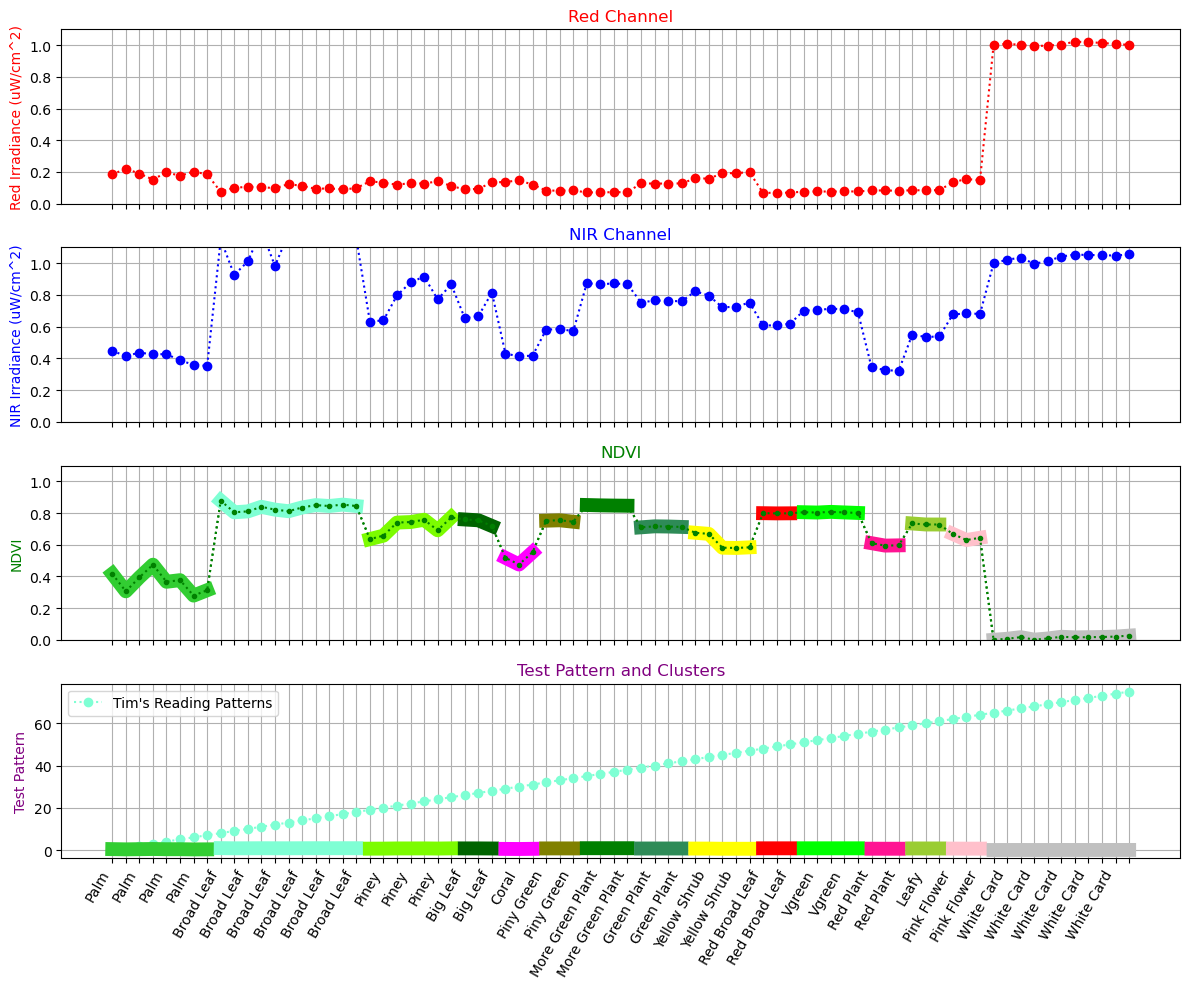

In [18]:
# Calculate NDVI                                                           Scaling Factors
red_channel =   df['irradiance_645nm_red_irradiance_uW_per_cm_squared']   * scaling_factor_save[9]    # Red channel at 645nm
nir_channel =   df['irradiance_860nm_linen_irradiance_uW_per_cm_squared'] * scaling_factor_save[15]     # NIR channel at 860nm
ndvi_values =   (nir_channel - red_channel) / (nir_channel + red_channel)
test_number =   df['Test_number']
df['NDVI']  =   ndvi_values

# Create subplots
fig, axs = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# Plot Red channel
#axs[0].plot(df['timestamp_iso8601'], red_channel, color='red', linewidth=2)
axs[0].plot(df['timestamp_iso8601'], red_channel, marker='o', linestyle='dotted', color='red',label = 'Red')
axs[0].set_ylabel('Red Irradiance (uW/cm^2)', color='red')
axs[0].set_title('Red Channel', color='red')
axs[0].grid()
axs[0].set_ylim(0,1.1)



# Plot NIR channel
#axs[1].plot(df['timestamp_iso8601'], nir_channel, color='blue', linewidth=2)
axs[1].plot(df['timestamp_iso8601'], nir_channel, marker='o', linestyle='dotted', color='blue',label = 'NIR')
axs[1].set_ylabel('NIR Irradiance (uW/cm^2)', color='blue')
axs[1].set_title('NIR Channel', color='blue')
axs[1].grid()
axs[1].set_ylim(0,1.1)



# Plot NDVI
#axs[2].plot(df['timestamp_iso8601'], ndvi_values, color='green', linewidth=2)
axs[2].plot(df['timestamp_iso8601'], ndvi_values, marker='o', linestyle='dotted', color='green',label = 'NDVI')
axs[2].set_ylabel('NDVI', color='green')
axs[2].set_title('NDVI', color='green')
axs[2].grid()
axs[2].set_ylim(0,1.1)


# Loop through each unique test pattern and plot its NDVI values as a time series
for test_pattern, color in test_colors.items():
    # Filter the DataFrame for the current test pattern
    pattern_data = df[df['Test'] == test_pattern]
    
    # Plot NDVI values for the current test pattern
    axs[2].plot(pattern_data['NDVI'], label=test_pattern, color=color,lw=10)

# Set x-axis ticks to be the index of each row in the DataFrame
x_labels = df['Test']
#plt.plot(df['NDVI']) #To get the x index correct.
axs[2].plot(df['NDVI'], marker='o', markersize =3,linestyle='dotted', color='green')
#plt.plot(df['NDVI'],linestyle='dotted', color='green')


# Plot Test
# Plot Test
#axs[2].plot(df['timestamp_iso8601'], ndvi_values, color='green', linewidth=2)
axs[3].plot(df['timestamp_iso8601'], test_number, marker='o', linestyle='dotted', color='aquamarine',label="Tim's Reading Patterns")
axs[3].set_ylabel('Test Pattern', color='purple')
axs[3].set_title('Test Pattern and Clusters', color='purple')
axs[3].grid()
#axs[3].set_ylim(0,18)
plt.legend()


# Plot every other x-label
plt.xticks(ticks=range(len(df)), labels=['' if i % 2 != 0 else label for i, label in enumerate(x_labels)], rotation=60, ha='right')



for test_pattern, color in test_colors.items():
    # Filter the DataFrame for the current test pattern
    pattern_data = df[df['Test'] == test_pattern]
    
    # Plot NDVI values for the current test pattern
    plt.plot(pattern_data['NDVI'], label=test_pattern, color=color,lw=10)


    # Set common xlabel
    #plt.xlabel('Timestamp (ISO8601)', color=color)


# Set common xlabel
#plt.xlabel('Timestamp (ISO8601)', color='green')

# Show the plot
plt.tight_layout()
plt.show()


# **Medium Decision Tree:**
---

![image.png](attachment:60bd7903-eb2b-4867-9893-1a9f4cee504a.png)

Supervised and unsupervised learnings are two major categories of machine learning. The main distinction between them is the presence of labels. Supervised learnings deal with labeled data while unsupervised learnings deal with data that are not labeled.
Under supervised learnings are regression and classification. In short, regression is used to predict continuous variables and classification is used to predict or classify discrete/categorical variables. In this article, we will look at Decision Tree Classifier, one of the methods for classification in ML.


**Decision Tree**

Decision tree is actually very intuitive and easy to understand. It is basically a set of Yes/No or if/else questions. Below is a typical diagram of decision tree.

Root node is either the topmost or the bottom node in a tree. bare nodes where the flow branches into several optional flows, and most importantly, leaf nodes are the end nodes with the final output.
That’s it! The concept of decision tree is very straightforward with nothing confusing. Along with this, another advantage of decision tree is that influences of feature scaling or regularization are not as huge as other models. However, at the same time, there is one major drawback of decision tree which is that it is subject to overfitting. For this reason, setting tree parameters before running the model is very important.
Now let’s go through decision tree classifier with Scikit-Learn.

**DecisionTreeClassifier()**

Scikit-Learn provides both DecisionTreeClassifier() and DecisionTreeRegressor(), but our major interest here is, of course, DecisionTreeClassifier(). The classifier can be important as following.


In this article, we went through decision tree classifier with Scikit-Learn and Python. Decision tree classifier is one of the simplest classification algorithms you can use in ML. It could perform classification very well, but at the same time, it is quite limited too. In upcoming articles, we will deal with other types of ML algorithms that are probably more sophisticated and complex. Thanks!


---

ndvi_names ['Palm', 'Broad Leaf', 'Piney', 'Big Leaf', 'Coral', 'Piny Green', 'More Green Plant', 'Green Plant', 'Yellow Shrub', 'Red Broad Leaf', 'Vgreen', 'Red Plant', 'Leafy', 'Pink Flower', 'White Card']
n_clusters: 15
(60, 3) (16, 3) (60,) (16,)

X:          Red       NIR      NDVI
0   0.184384  0.447654  0.416543
1   0.219959  0.414026  0.306107
2   0.189716  0.436174  0.393771
3   0.151704  0.425256  0.474125
4   0.197791  0.426504  0.366354
..       ...       ...       ...
71  1.023005  1.055152  0.015469
72  1.017749  1.052035  0.016565
73  1.014931  1.051786  0.017833
74  1.006399  1.048291  0.020389
75  1.002438  1.056713  0.026358

[76 rows x 3 columns]
X_test:          Red       NIR      NDVI
68  0.994135  0.996384   0.00113
47  0.197753  0.752309  0.583705
23  0.126223   0.91621   0.75783
33  0.082118  0.586661  0.754425
31  0.120092  0.417333  0.553085
14   0.11137  1.239083  0.835063
73  1.014931  1.051786  0.017833
71  1.023005  1.055152  0.015469
4   0.197791  0.42650

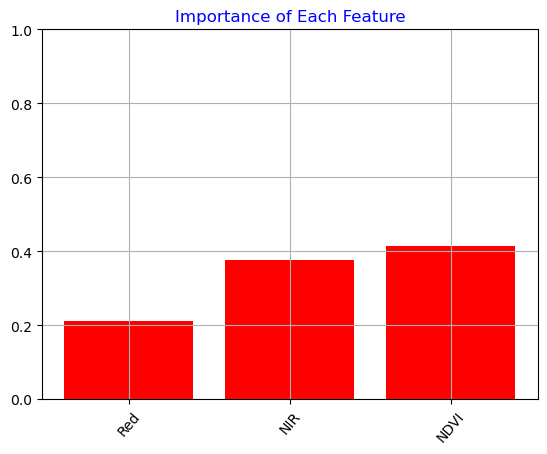

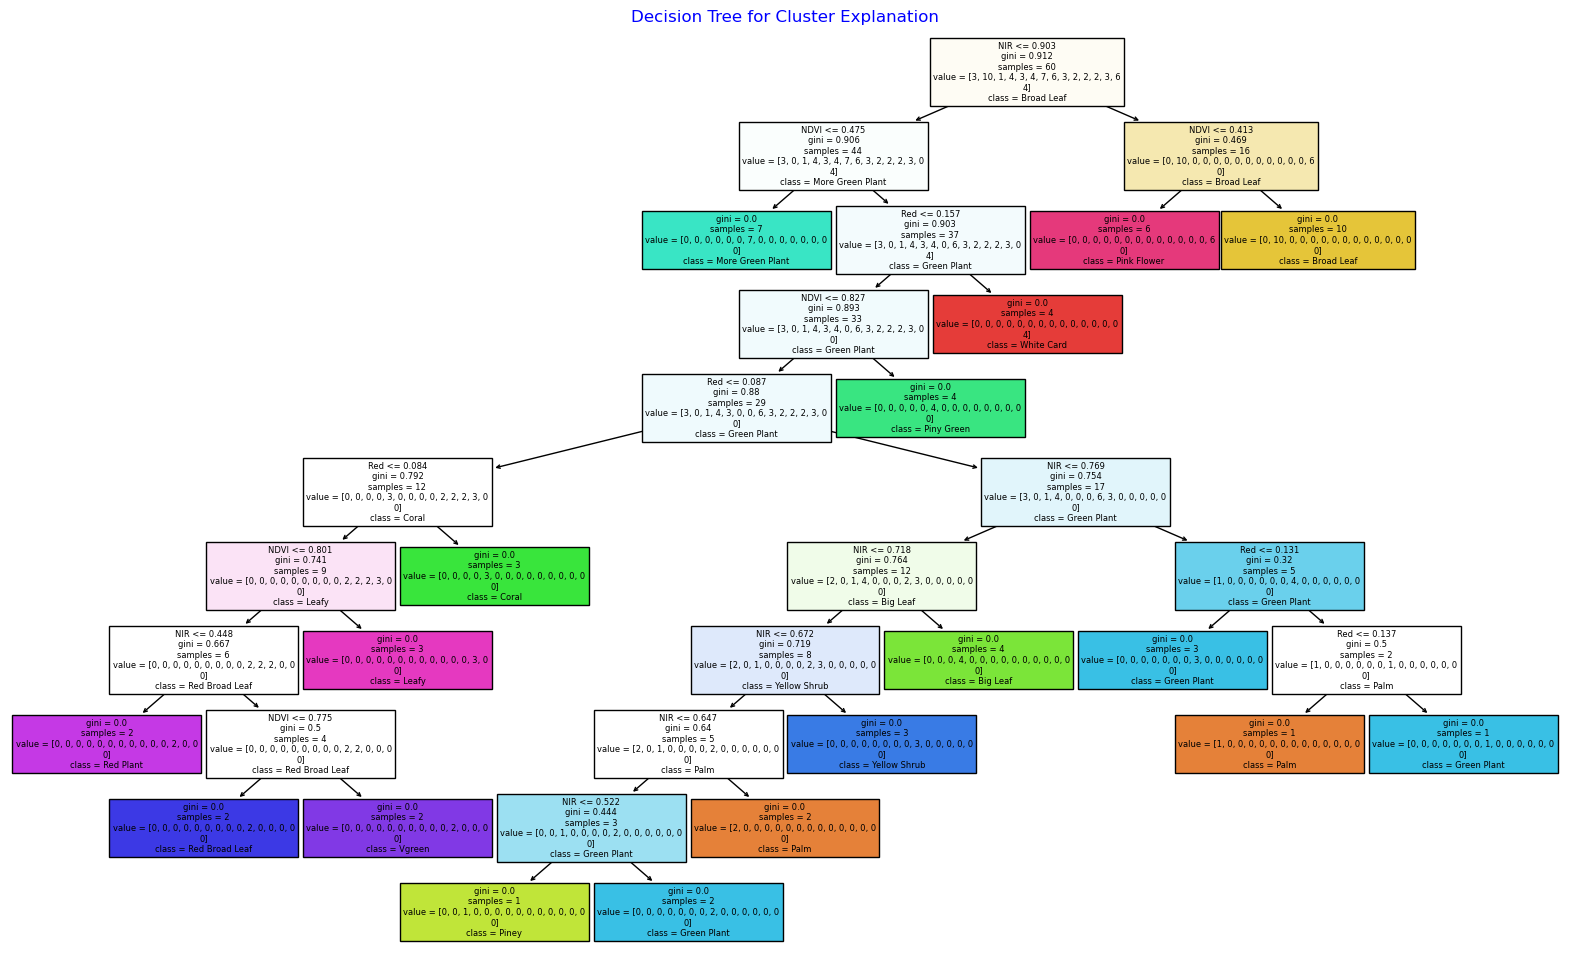

['Palm' 'Palm' 'Palm' 'Palm' 'Palm' 'Palm' 'Palm' 'Palm' 'Broad Leaf'
 'Broad Leaf' 'Broad Leaf' 'Broad Leaf' 'Broad Leaf' 'Broad Leaf'
 'Broad Leaf' 'Broad Leaf' 'Broad Leaf' 'Broad Leaf' 'Broad Leaf' 'Piney'
 'Piney' 'Piney' 'Piney' 'Broad Leaf' 'Piney' 'Piney' 'Big Leaf'
 'Big Leaf' 'Big Leaf' 'Coral' 'Coral' 'Coral' 'Piny Green' 'Piny Green'
 'Piny Green' 'More Green Plant' 'More Green Plant' 'More Green Plant'
 'More Green Plant' 'Green Plant' 'Green Plant' 'Green Plant'
 'Green Plant' 'Yellow Shrub' 'Yellow Shrub' 'Yellow Shrub' 'Yellow Shrub'
 'Yellow Shrub' 'Red Broad Leaf' 'Red Broad Leaf' 'Red Broad Leaf'
 'Vgreen' 'Vgreen' 'Vgreen' 'Vgreen' 'Red Broad Leaf' 'Red Plant'
 'Red Plant' 'Red Plant' 'Leafy' 'Leafy' 'Leafy' 'Pink Flower'
 'Pink Flower' 'Pink Flower' 'White Card' 'White Card' 'White Card'
 'White Card' 'White Card' 'White Card' 'White Card' 'White Card'
 'White Card' 'White Card' 'White Card']


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree

from sklearn.tree import plot_tree
from sklearn.tree import _tree

from sklearn.metrics import accuracy_score


# Calculate NDVI                                                           Scaling Factors
red_channel =   df['irradiance_645nm_red_irradiance_uW_per_cm_squared']   * scaling_factor_save[9]    # Red channel at 645nm
nir_channel =   df['irradiance_860nm_linen_irradiance_uW_per_cm_squared'] * scaling_factor_save[15]     # NIR channel at 860nm
ndvi_values =   (nir_channel - red_channel) / (nir_channel + red_channel)
test_number =   df['Test']



# Stack the arrays horizontally to form data_selected
X = np.stack((red_channel, nir_channel, ndvi_values,test_number), axis=1)


ndvi_df = pd.DataFrame(X, columns = ['Red', 'NIR', 'NDVI','Test'])
#ndvi_df['Test'] = ndvi_df.target
#ndvi_df.head()


    

#ndvi_names = ['White_Knee','0Grass', '1White' , '1Hedge','2White' , '2Pine','3White', '3Bush', '4White', '4Palm', '5White', '5Lawn', '7White','7Lawn','7Asphalt','7Gutter']

ndvi_names, cluster_colors = zip(*test_colors.items())
ndvi_names = np.array(ndvi_names)
ndvi_names = list(ndvi_names)
cluster_colors = list(cluster_colors)

print('ndvi_names',ndvi_names)

n_clusters = len(test_number.unique())
print('n_clusters:',n_clusters)



# Assign cluster in Supervised approach
cluster_assignments = test_number


X = ndvi_df.drop(['Test'], axis = 1)
y = ndvi_df['Test']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print()




# Create a decision tree classifier with a maximum depth of 3 (adjust as needed)
#tree_classifier = DecisionTreeClassifier(max_depth=7, random_state=0)
tree_classifier = DecisionTreeClassifier(random_state=0)
tree_classifier.fit(X_train, y_train)




predicted = tree_classifier.predict(X_test)
print('X:',X)
print('X_test:',X_test)



print()
accuracy = accuracy_score(predicted, y_test)
print(f'Accuracy: {accuracy}')

print()
print('tree_classifier.feature_importances_:',tree_classifier.feature_importances_)

print()
print('ndvi_df.columns:',ndvi_df.columns[:3])


plt.bar(ndvi_df.columns[:3], tree_classifier.feature_importances_,color='red')
plt.xticks(rotation = 50)
plt.ylim(0,1)
plt.title('Importance of Each Feature', color='blue')
plt.grid()

plt.show()



# Visualize the decision tree
plt.figure(figsize=(20, 12))
#plot_tree(tree_classifier, filled=True, feature_names=['Red', 'NIR', 'NDVI'], class_names=[f'Cluster {i + 1}' for i in range(n_clusters)])
plot_tree(tree_classifier, filled=True, feature_names=['Red', 'NIR', 'NDVI'], class_names=ndvi_names)
#plot_tree(tree_classifier, filled=True, feature_names=['Red', 'NIR', 'NDVI'], class_names=df['Test'])
plt.title('Decision Tree for Cluster Explanation', color='blue')

plt.savefig('Decision_tree_supervised.pdf')

plt.show()


predicted = tree_classifier.predict(X)
print(predicted)

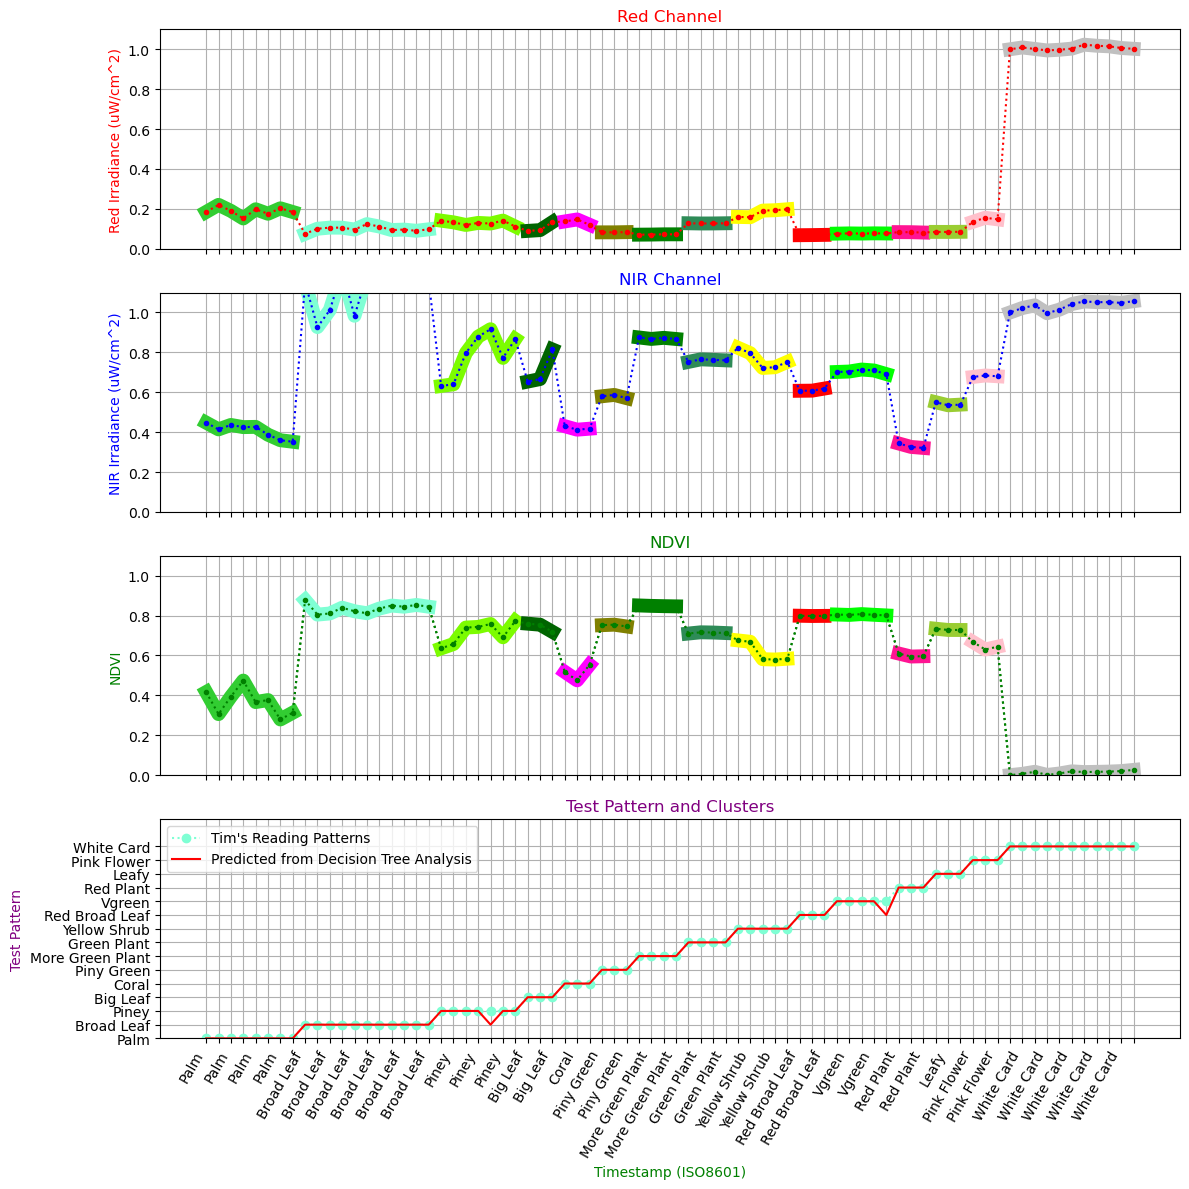

In [20]:
# Calculate NDVI                                                           Scaling Factors
red_channel =   df['irradiance_645nm_red_irradiance_uW_per_cm_squared']   * scaling_factor_save[9]    # Red channel at 645nm
nir_channel =   df['irradiance_860nm_linen_irradiance_uW_per_cm_squared'] * scaling_factor_save[15]     # NIR channel at 860nm
ndvi_values =   (nir_channel - red_channel) / (nir_channel + red_channel)
test_number =   df['Test']

# Create subplots
fig, axs = plt.subplots(4, 1, figsize=(12, 12), sharex=True)

# Plot Red channel
#axs[0].plot(df['timestamp_iso8601'], red_channel, color='red', linewidth=2)
axs[0].set_ylabel('Red Irradiance (uW/cm^2)', color='red')
axs[0].set_title('Red Channel', color='red')
axs[0].grid()
axs[0].set_ylim(0,1.1)

# Loop through each unique test pattern and plot its NDVI values as a time series
for test_pattern, color in test_colors.items():
    # Filter the DataFrame for the current test pattern
    pattern_data = df[df['Test'] == test_pattern]
    
    # Plot NDVI values for the current test pattern
    axs[0].plot(pattern_data['irradiance_645nm_red_irradiance_uW_per_cm_squared']* scaling_factor_save[9], label=test_pattern, color=color,lw=10)

axs[0].plot(df['timestamp_iso8601'], red_channel, marker='o',  markersize =3, linestyle='dotted', color='red',label = 'Red')


# Plot NIR channel
#axs[1].plot(df['timestamp_iso8601'], nir_channel, color='blue', linewidth=2)
#axs[1].plot(df['timestamp_iso8601'], nir_channel, marker='o', linestyle='dotted', color='blue',label = 'NIR')
axs[1].set_ylabel('NIR Irradiance (uW/cm^2)', color='blue')
axs[1].set_title('NIR Channel', color='blue')
axs[1].grid()
axs[1].set_ylim(0,1.1)

# Loop through each unique test pattern and plot its NDVI values as a time series
for test_pattern, color in test_colors.items():
    # Filter the DataFrame for the current test pattern
    pattern_data = df[df['Test'] == test_pattern]
    
    # Plot NDVI values for the current test pattern
    axs[1].plot(pattern_data['irradiance_860nm_linen_irradiance_uW_per_cm_squared']* scaling_factor_save[15], label=test_pattern, color=color,lw=10)

axs[1].plot(df['timestamp_iso8601'], nir_channel, marker='o',  markersize =3, linestyle='dotted', color='blue',label = 'NIR')


# Plot NDVI
#axs[2].plot(df['timestamp_iso8601'], ndvi_values, color='green', linewidth=2)
axs[2].plot(df['timestamp_iso8601'], ndvi_values, marker='o', linestyle='dotted', color='green',label = 'NDVI')
axs[2].set_ylabel('NDVI', color='green')
axs[2].set_title('NDVI', color='green')
axs[2].grid()
axs[2].set_ylim(0,1.1)


# Loop through each unique test pattern and plot its NDVI values as a time series
for test_pattern, color in test_colors.items():
    # Filter the DataFrame for the current test pattern
    pattern_data = df[df['Test'] == test_pattern]
    
    # Plot NDVI values for the current test pattern
    axs[2].plot(pattern_data['NDVI'], label=test_pattern, color=color,lw=10)

# Set x-axis ticks to be the index of each row in the DataFrame
x_labels = df['Test']
#plt.plot(df['NDVI']) #To get the x index correct.
axs[2].plot(df['NDVI'], marker='o', markersize =3,linestyle='dotted', color='green')
#plt.plot(df['NDVI'],linestyle='dotted', color='green')

# Plot every other x-label
plt.xticks(ticks=range(len(df)), labels=['' if i % 2 != 0 else label for i, label in enumerate(x_labels)], rotation=60, ha='right')



# Plot Test
#axs[2].plot(df['timestamp_iso8601'], ndvi_values, color='green', linewidth=2)
axs[3].plot(df['timestamp_iso8601'], test_number, marker='o', linestyle='dotted', color='aquamarine',label="Tim's Reading Patterns")
axs[3].plot(df['timestamp_iso8601'], predicted,  linestyle='-', color='red',label = 'Predicted from Decision Tree Analysis')
#axs[3].plot(df['timestamp_iso8601'], pred,  linestyle='-', color='blue',label = 'Predicted from Decision Tree Logic')
axs[3].set_ylabel('Test Pattern', color='purple')
axs[3].set_title('Test Pattern and Clusters', color='purple')
axs[3].grid()
axs[3].set_ylim(0,16)
plt.legend()


# Set common xlabel
plt.xlabel('Timestamp (ISO8601)', color='green')

# Show the plot
plt.tight_layout()
plt.show()
    
    

In [21]:
#rules = get_rules(tree_classifier, feature_names=['Red', 'NIR', 'NDVI'], class_names=ndvi_names)


#text_representation = tree.export_text(tree_classifier,feature_names=['Red', 'NIR', 'NDVI'], class_names=ndvi_names)
text_representation = tree.export_text(tree_classifier,feature_names=['Red', 'NIR', 'NDVI'], class_names=ndvi_names)
print(text_representation)

|--- NIR <= 0.90
|   |--- NDVI <= 0.47
|   |   |--- class: More Green Plant
|   |--- NDVI >  0.47
|   |   |--- Red <= 0.16
|   |   |   |--- NDVI <= 0.83
|   |   |   |   |--- Red <= 0.09
|   |   |   |   |   |--- Red <= 0.08
|   |   |   |   |   |   |--- NDVI <= 0.80
|   |   |   |   |   |   |   |--- NIR <= 0.45
|   |   |   |   |   |   |   |   |--- class: Red Plant
|   |   |   |   |   |   |   |--- NIR >  0.45
|   |   |   |   |   |   |   |   |--- NDVI <= 0.77
|   |   |   |   |   |   |   |   |   |--- class: Red Broad Leaf
|   |   |   |   |   |   |   |   |--- NDVI >  0.77
|   |   |   |   |   |   |   |   |   |--- class: Vgreen
|   |   |   |   |   |   |--- NDVI >  0.80
|   |   |   |   |   |   |   |--- class: Leafy
|   |   |   |   |   |--- Red >  0.08
|   |   |   |   |   |   |--- class: Coral
|   |   |   |   |--- Red >  0.09
|   |   |   |   |   |--- NIR <= 0.77
|   |   |   |   |   |   |--- NIR <= 0.72
|   |   |   |   |   |   |   |--- NIR <= 0.67
|   |   |   |   |   |   |   |   |--- NIR <= 0.65
|

## **Create our own code logic from the Decision Tree method, but our conversion code below is not working well. BUG!**

In [22]:
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if "  # format start of it statement
        
        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += ": "
        if class_names is None:
            rule += "class response: "+str(np.round(path[-1][0][0][0],3))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"\n    return '{class_names[l]}' # probability of {np.round(100.0*classes[l]/np.sum(classes),2)}%"
        rule += f" , based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules

In [23]:
# Calculate NDVI                                                           Scaling Factors
red_channel =   df['irradiance_645nm_red_irradiance_uW_per_cm_squared']   * scaling_factor_save[9]    # Red channel at 645nm
nir_channel =   df['irradiance_860nm_linen_irradiance_uW_per_cm_squared'] * scaling_factor_save[15]     # NIR channel at 860nm
ndvi_values =   (nir_channel - red_channel) / (nir_channel + red_channel)
test_number =   df['Test']



# Stack the arrays horizontally to form data_selected
X = np.stack((red_channel, nir_channel, ndvi_values,test_number), axis=1)


ndvi_df = pd.DataFrame(X, columns = ['Red', 'NIR', 'NDVI','Test'])
#ndvi_df['Test'] = ndvi_df.target
#ndvi_df.head()


    

#ndvi_names = ['White_Knee','0Grass', '1White' , '1Hedge','2White' , '2Pine','3White', '3Bush', '4White', '4Palm', '5White', '5Lawn', '7White','7Lawn','7Asphalt','7Gutter']

ndvi_names, cluster_colors = zip(*test_colors.items())
ndvi_names = np.array(ndvi_names)
ndvi_names = list(ndvi_names)
cluster_colors = list(cluster_colors)

print('ndvi_names',ndvi_names)

n_clusters = len(test_number.unique())
print('n_clusters:',n_clusters)



# Assign cluster in Supervised approach
cluster_assignments = test_number


X = ndvi_df.drop(['Test'], axis = 1)
y = ndvi_df['Test']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print()




# Create a decision tree classifier with a maximum depth of 3 (adjust as needed)
#tree_classifier = DecisionTreeClassifier(max_depth=7, random_state=0)
tree_classifier = DecisionTreeClassifier(max_depth=37, random_state=0)
tree_classifier.fit(X_train, y_train)




rules = get_rules(tree_classifier, feature_names=['Red', 'NIR', 'NDVI'], class_names=ndvi_names)

for r in rules:
    print(r)





ndvi_names ['Palm', 'Broad Leaf', 'Piney', 'Big Leaf', 'Coral', 'Piny Green', 'More Green Plant', 'Green Plant', 'Yellow Shrub', 'Red Broad Leaf', 'Vgreen', 'Red Plant', 'Leafy', 'Pink Flower', 'White Card']
n_clusters: 15
(60, 3) (16, 3) (60,) (16,)

if (NIR > 0.903) and (NDVI > 0.413): 
    return 'Broad Leaf' # probability of 100.0% , based on 10 samples
if (NIR <= 0.903) and (NDVI <= 0.475): 
    return 'More Green Plant' # probability of 100.0% , based on 7 samples
if (NIR > 0.903) and (NDVI <= 0.413): 
    return 'Pink Flower' # probability of 100.0% , based on 6 samples
if (NIR <= 0.903) and (NDVI > 0.475) and (Red > 0.157): 
    return 'White Card' # probability of 100.0% , based on 4 samples
if (NIR <= 0.903) and (NDVI > 0.475) and (Red <= 0.157) and (NDVI > 0.827): 
    return 'Piny Green' # probability of 100.0% , based on 4 samples
if (NIR <= 0.903) and (NDVI > 0.475) and (Red <= 0.157) and (NDVI <= 0.827) and (Red > 0.087) and (NIR <= 0.769) and (NIR > 0.718): 
    return 

## **Apply this logic to make our own predictions, but there appears to be a bug with our logic and making these predictions.**

This needs to be debugged below. The normal Decision Tree method works well, but our conversion into code has a problem?

In [24]:
def classify_pixel(NDVI, NIR, Red):
    
    
    
    if (NIR > 0.903) and (NDVI > 0.413): 
        return 'Broad Leaf' # probability of 100.0% , based on 10 samples
    if (NIR <= 0.903) and (NDVI <= 0.475): 
        return 'More Green Plant' # probability of 100.0% , based on 7 samples
    if (NIR > 0.903) and (NDVI <= 0.413): 
        return 'Pink Flower' # probability of 100.0% , based on 6 samples
    if (NIR <= 0.903) and (NDVI > 0.475) and (Red > 0.157): 
        return 'White Card' # probability of 100.0% , based on 4 samples
    if (NIR <= 0.903) and (NDVI > 0.475) and (Red <= 0.157) and (NDVI > 0.827): 
        return 'Piny Green' # probability of 100.0% , based on 4 samples
    if (NIR <= 0.903) and (NDVI > 0.475) and (Red <= 0.157) and (NDVI <= 0.827) and (Red > 0.087) and (NIR <= 0.769) and (NIR > 0.718): 
        return 'Big Leaf' # probability of 100.0% , based on 4 samples
    if (NIR <= 0.903) and (NDVI > 0.475) and (Red <= 0.157) and (NDVI <= 0.827) and (Red > 0.087) and (NIR > 0.769) and (Red <= 0.131): 
        return 'Green Plant' # probability of 100.0% , based on 3 samples
    if (NIR <= 0.903) and (NDVI > 0.475) and (Red <= 0.157) and (NDVI <= 0.827) and (Red > 0.087) and (NIR <= 0.769) and (NIR <= 0.718) and (NIR > 0.672): 
        return 'Yellow Shrub' # probability of 100.0% , based on 3 samples
    if (NIR <= 0.903) and (NDVI > 0.475) and (Red <= 0.157) and (NDVI <= 0.827) and (Red <= 0.087) and (Red > 0.084): 
        return 'Coral' # probability of 100.0% , based on 3 samples
    if (NIR <= 0.903) and (NDVI > 0.475) and (Red <= 0.157) and (NDVI <= 0.827) and (Red <= 0.087) and (Red <= 0.084) and (NDVI > 0.801): 
        return 'Leafy' # probability of 100.0% , based on 3 samples
    if (NIR <= 0.903) and (NDVI > 0.475) and (Red <= 0.157) and (NDVI <= 0.827) and (Red > 0.087) and (NIR <= 0.769) and (NIR <= 0.718) and (NIR <= 0.672) and (NIR <= 0.647) and (NIR > 0.522): 
        return 'Green Plant' # probability of 100.0% , based on 2 samples
    if (NIR <= 0.903) and (NDVI > 0.475) and (Red <= 0.157) and (NDVI <= 0.827) and (Red <= 0.087) and (Red <= 0.084) and (NDVI <= 0.801) and (NIR > 0.448) and (NDVI > 0.775): 
        return 'Vgreen' # probability of 100.0% , based on 2 samples
    if (NIR <= 0.903) and (NDVI > 0.475) and (Red <= 0.157) and (NDVI <= 0.827) and (Red <= 0.087) and (Red <= 0.084) and (NDVI <= 0.801) and (NIR > 0.448) and (NDVI <= 0.775): 
        return 'Red Broad Leaf' # probability of 100.0% , based on 2 samples
    if (NIR <= 0.903) and (NDVI > 0.475) and (Red <= 0.157) and (NDVI <= 0.827) and (Red <= 0.087) and (Red <= 0.084) and (NDVI <= 0.801) and (NIR <= 0.448): 
        return 'Red Plant' # probability of 100.0% , based on 2 samples
    if (NIR <= 0.903) and (NDVI > 0.475) and (Red <= 0.157) and (NDVI <= 0.827) and (Red > 0.087) and (NIR <= 0.769) and (NIR <= 0.718) and (NIR <= 0.672) and (NIR > 0.647): 
        return 'Palm' # probability of 100.0% , based on 2 samples
    if (NIR <= 0.903) and (NDVI > 0.475) and (Red <= 0.157) and (NDVI <= 0.827) and (Red > 0.087) and (NIR > 0.769) and (Red > 0.131) and (Red > 0.137): 
        return 'Green Plant' # probability of 100.0% , based on 1 samples
    if (NIR <= 0.903) and (NDVI > 0.475) and (Red <= 0.157) and (NDVI <= 0.827) and (Red > 0.087) and (NIR > 0.769) and (Red > 0.131) and (Red <= 0.137): 
        return 'Palm' # probability of 100.0% , based on 1 samples
    if (NIR <= 0.903) and (NDVI > 0.475) and (Red <= 0.157) and (NDVI <= 0.827) and (Red > 0.087) and (NIR <= 0.769) and (NIR <= 0.718) and (NIR <= 0.672) and (NIR <= 0.647) and (NIR <= 0.522): 
        return 'Piney' # probability of 100.0% , based on 1 samples    



In [25]:
pred = []

for i in range(0 , len(df)):
#for timestamp_index in range(start_timestamp_index, end_timestamp_index + 1):

    # Calculate NDVI                                                           Scaling Factors
    Red =   df['irradiance_645nm_red_irradiance_uW_per_cm_squared'][i]   * scaling_factor_save[9]    # Red channel at 645nm
    NIR =   df['irradiance_860nm_linen_irradiance_uW_per_cm_squared'][i] * scaling_factor_save[15]     # NIR channel at 860nm
    NDVI =   (NIR - Red) / (NIR + Red)
    #test_number =   df['Test_number']

    test = classify_pixel(NDVI, NIR, Red)
    
    pred.append(test)
    #print(test)
print(pred)

['More Green Plant', 'More Green Plant', 'More Green Plant', 'More Green Plant', 'More Green Plant', 'More Green Plant', 'More Green Plant', 'More Green Plant', 'Broad Leaf', 'Broad Leaf', 'Broad Leaf', 'Broad Leaf', 'Broad Leaf', 'Broad Leaf', 'Broad Leaf', 'Broad Leaf', 'Broad Leaf', 'Broad Leaf', 'Broad Leaf', 'Green Plant', 'Green Plant', 'Green Plant', 'Green Plant', 'Broad Leaf', 'Green Plant', 'Green Plant', 'Palm', 'Palm', 'Palm', 'Piney', 'Piney', 'Piney', 'Red Broad Leaf', 'Red Broad Leaf', 'Red Broad Leaf', 'Piny Green', 'Piny Green', 'Piny Green', 'Piny Green', 'Big Leaf', 'Big Leaf', 'Big Leaf', 'Big Leaf', 'White Card', 'White Card', 'White Card', 'White Card', 'White Card', 'Vgreen', 'Vgreen', 'Vgreen', 'Leafy', 'Leafy', 'Leafy', 'Leafy', 'Vgreen', 'Red Plant', 'Red Plant', 'Red Plant', 'Coral', 'Coral', 'Coral', 'Yellow Shrub', 'Yellow Shrub', 'Yellow Shrub', 'Pink Flower', 'Pink Flower', 'Pink Flower', 'Pink Flower', 'Pink Flower', 'Pink Flower', 'Pink Flower', 'Pink F

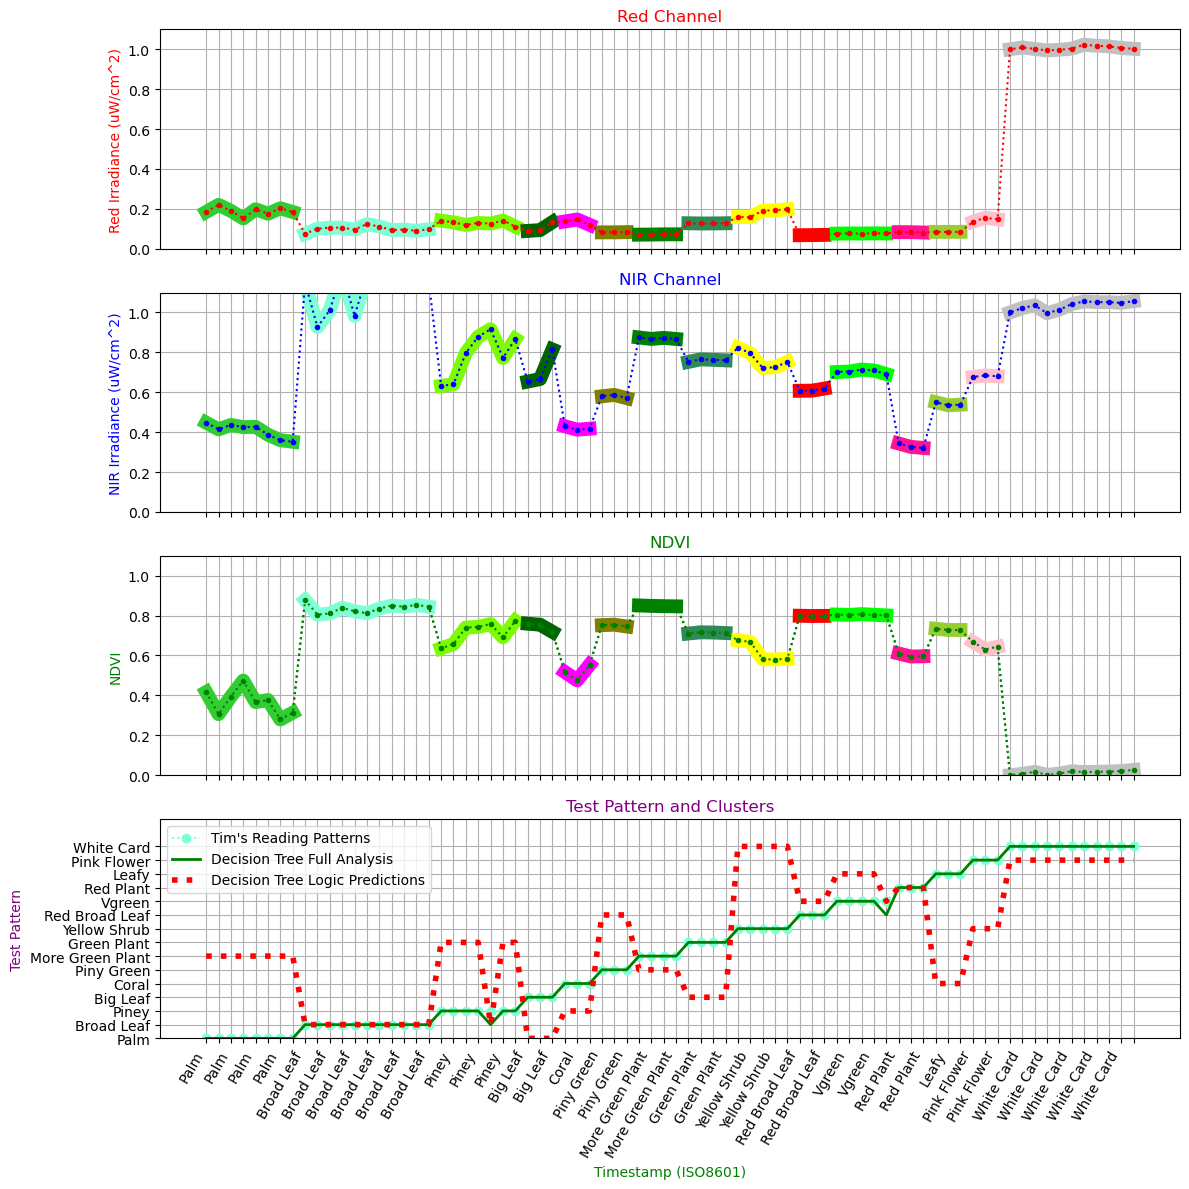

In [26]:
# Calculate NDVI                                                           Scaling Factors
red_channel =   df['irradiance_645nm_red_irradiance_uW_per_cm_squared']   * scaling_factor_save[9]    # Red channel at 645nm
nir_channel =   df['irradiance_860nm_linen_irradiance_uW_per_cm_squared'] * scaling_factor_save[15]     # NIR channel at 860nm
ndvi_values =   (nir_channel - red_channel) / (nir_channel + red_channel)
test_number =   df['Test']

# Create subplots
fig, axs = plt.subplots(4, 1, figsize=(12, 12), sharex=True)

# Plot Red channel
#axs[0].plot(df['timestamp_iso8601'], red_channel, color='red', linewidth=2)
axs[0].set_ylabel('Red Irradiance (uW/cm^2)', color='red')
axs[0].set_title('Red Channel', color='red')
axs[0].grid()
axs[0].set_ylim(0,1.1)

# Loop through each unique test pattern and plot its NDVI values as a time series
for test_pattern, color in test_colors.items():
    # Filter the DataFrame for the current test pattern
    pattern_data = df[df['Test'] == test_pattern]
    
    # Plot NDVI values for the current test pattern
    axs[0].plot(pattern_data['irradiance_645nm_red_irradiance_uW_per_cm_squared']* scaling_factor_save[9], label=test_pattern, color=color,lw=10)

axs[0].plot(df['timestamp_iso8601'], red_channel, marker='o',  markersize =3, linestyle='dotted', color='red',label = 'Red')


# Plot NIR channel
#axs[1].plot(df['timestamp_iso8601'], nir_channel, color='blue', linewidth=2)
#axs[1].plot(df['timestamp_iso8601'], nir_channel, marker='o', linestyle='dotted', color='blue',label = 'NIR')
axs[1].set_ylabel('NIR Irradiance (uW/cm^2)', color='blue')
axs[1].set_title('NIR Channel', color='blue')
axs[1].grid()
axs[1].set_ylim(0,1.1)

# Loop through each unique test pattern and plot its NDVI values as a time series
for test_pattern, color in test_colors.items():
    # Filter the DataFrame for the current test pattern
    pattern_data = df[df['Test'] == test_pattern]
    
    # Plot NDVI values for the current test pattern
    axs[1].plot(pattern_data['irradiance_860nm_linen_irradiance_uW_per_cm_squared']* scaling_factor_save[15], label=test_pattern, color=color,lw=10)

axs[1].plot(df['timestamp_iso8601'], nir_channel, marker='o',  markersize =3, linestyle='dotted', color='blue',label = 'NIR')


# Plot NDVI
#axs[2].plot(df['timestamp_iso8601'], ndvi_values, color='green', linewidth=2)
axs[2].plot(df['timestamp_iso8601'], ndvi_values, marker='o', linestyle='dotted', color='green',label = 'NDVI')
axs[2].set_ylabel('NDVI', color='green')
axs[2].set_title('NDVI', color='green')
axs[2].grid()
axs[2].set_ylim(0,1.1)


# Loop through each unique test pattern and plot its NDVI values as a time series
for test_pattern, color in test_colors.items():
    # Filter the DataFrame for the current test pattern
    pattern_data = df[df['Test'] == test_pattern]
    
    # Plot NDVI values for the current test pattern
    axs[2].plot(pattern_data['NDVI'], label=test_pattern, color=color,lw=10)

# Set x-axis ticks to be the index of each row in the DataFrame
x_labels = df['Test']
#plt.plot(df['NDVI']) #To get the x index correct.
axs[2].plot(df['NDVI'], marker='o', markersize =3,linestyle='dotted', color='green')
#plt.plot(df['NDVI'],linestyle='dotted', color='green')

# Plot every other x-label
plt.xticks(ticks=range(len(df)), labels=['' if i % 2 != 0 else label for i, label in enumerate(x_labels)], rotation=60, ha='right')



# Plot Test
#axs[2].plot(df['timestamp_iso8601'], ndvi_values, color='green', linewidth=2)
axs[3].plot(df['timestamp_iso8601'], test_number, marker='o', linestyle='dotted', color='aquamarine',label="Tim's Reading Patterns")
axs[3].plot(df['timestamp_iso8601'], predicted,  linestyle='-', lw=2,color='green',label = 'Decision Tree Full Analysis')
axs[3].plot(df['timestamp_iso8601'], pred,  linestyle='dotted', color='red',lw=4,label = 'Decision Tree Logic Predictions')
axs[3].set_ylabel('Test Pattern', color='purple')
axs[3].set_title('Test Pattern and Clusters', color='purple')
axs[3].grid()
axs[3].set_ylim(0,16)
plt.legend()


# Set common xlabel
plt.xlabel('Timestamp (ISO8601)', color='green')

# Show the plot
plt.tight_layout()
plt.show()
    
    

# **Define End Members of each Species:**
---

To perform spectral unmixing using the data from your DataFrame `df`, you can follow these steps:

1. Read in the spectral data from your DataFrame, including the Red, NIR, and NDVI values, as well as the test patterns.

2. Identify unique test patterns from the `Test` column.

3. For each unique test pattern, calculate the average spectral values (endmembers) for Red, NIR, and NDVI.

4. Read in the spectral data again, and for each pixel, perform unmixing using the endmembers to estimate the abundance fractions of each test pattern.

Here's how you can implement these steps in Python:

```python
import pandas as pd
import numpy as np

# Step 1: Read in the spectral data from DataFrame
df = pd.read_csv('your_data.csv')  # Update 'your_data.csv' with the path to your data file

# Calculate spectral values
red_channel = df['irradiance_645nm_red_irradiance_uW_per_cm_squared'] * scaling_factor_save[9]
nir_channel = df['irradiance_860nm_linen_irradiance_uW_per_cm_squared'] * scaling_factor_save[15]
ndvi_values = (nir_channel - red_channel) / (nir_channel + red_channel)
test_patterns = df['Test']

# Step 2: Identify unique test patterns
unique_test_patterns = test_patterns.unique()

# Step 3: Calculate endmembers for each unique test pattern
endmembers = {}
for test_pattern in unique_test_patterns:
    # Filter DataFrame for the current test pattern
    test_data = df[df['Test'] == test_pattern]
    
    # Calculate average spectral values (endmembers) for Red, NIR, and NDVI
    red_endmember = test_data['irradiance_645nm_red_irradiance_uW_per_cm_squared'].mean() * scaling_factor_save[9]
    nir_endmember = test_data['irradiance_860nm_linen_irradiance_uW_per_cm_squared'].mean() * scaling_factor_save[15]
    ndvi_endmember = (nir_endmember - red_endmember) / (nir_endmember + red_endmember)
    
    # Store endmembers for the current test pattern
    endmembers[test_pattern] = {'red': red_endmember, 'nir': nir_endmember, 'ndvi': ndvi_endmember}

# Step 4: Perform unmixing for each pixel
abundance_fractions = {}
for index, row in df.iterrows():
    # Extract spectral values for the current pixel
    red_pixel = row['irradiance_645nm_red_irradiance_uW_per_cm_squared'] * scaling_factor_save[9]
    nir_pixel = row['irradiance_860nm_linen_irradiance_uW_per_cm_squared'] * scaling_factor_save[15]
    ndvi_pixel = (nir_pixel - red_pixel) / (nir_pixel + red_pixel)
    
    # Initialize abundance fractions for the current pixel
    abundance_fractions[index] = {}
    
    # Perform unmixing using endmembers
    for test_pattern, endmember in endmembers.items():
        red_endmember = endmember['red']
        nir_endmember = endmember['nir']
        ndvi_endmember = endmember['ndvi']
        
        # Calculate abundance fractions using linear unmixing equation
        red_fraction = (red_pixel - red_endmember) / (nir_endmember - red_endmember)
        nir_fraction = (nir_pixel - nir_endmember) / (nir_endmember - red_endmember)
        ndvi_fraction = (ndvi_pixel - ndvi_endmember) / (1 - ndvi_endmember)
        
        # Store abundance fractions for the current test pattern and pixel
        abundance_fractions[index][test_pattern] = {'red': red_fraction, 'nir': nir_fraction, 'ndvi': ndvi_fraction}

# Now abundance_fractions dictionary contains the abundance fractions of each test pattern for each pixel
```

In this code:

- We first read in the spectral data from your DataFrame and calculate the Red, NIR, and NDVI values.
- We then identify unique test patterns and calculate the average spectral values (endmembers) for each test pattern.
- Next, we perform unmixing for each pixel in the dataset using the calculated endmembers, estimating the abundance fractions of each test pattern.
- The result is stored in the `abundance_fractions` dictionary, which contains the abundance fractions of each test pattern for each pixel in the dataset.

## Endmembers works well below:
---

In [27]:
import pandas as pd
import numpy as np

# Step 1: Read in the spectral data from DataFrame
#df = pd.read_csv('your_data.csv')  # Update 'your_data.csv' with the path to your data file

# Calculate spectral values
red_channel = df['irradiance_645nm_red_irradiance_uW_per_cm_squared'] * scaling_factor_save[9]
nir_channel = df['irradiance_860nm_linen_irradiance_uW_per_cm_squared'] * scaling_factor_save[15]
ndvi_values = (nir_channel - red_channel) / (nir_channel + red_channel)
test_patterns = df['Test']
df['NDVI'] = ndvi_values

# Step 2: Identify unique test patterns
unique_test_patterns = test_patterns.unique()

# Step 3: Calculate endmembers for each unique test pattern
endmembers = {}
for test_pattern in unique_test_patterns:
    # Filter DataFrame for the current test pattern
    test_data = df[df['Test'] == test_pattern]
    
    # Calculate average spectral values (endmembers) for Red, NIR, and NDVI
    red_endmember = test_data['irradiance_645nm_red_irradiance_uW_per_cm_squared'].mean() * scaling_factor_save[9]
    nir_endmember = test_data['irradiance_860nm_linen_irradiance_uW_per_cm_squared'].mean() * scaling_factor_save[15]
    ndvi_endmember = (nir_endmember - red_endmember) / (nir_endmember + red_endmember)
    
    # Store endmembers for the current test pattern
    endmembers[test_pattern] = {'red': red_endmember, 'nir': nir_endmember, 'ndvi': ndvi_endmember}
    print('Test_pattern: \t',   test_pattern  ,'\t','\t', endmembers[test_pattern])

      
    #print(endmembers)

Test_pattern: 	 Palm 	 	 {'red': 0.1882117738954319, 'nir': 0.4060398136101744, 'ndvi': 0.36655861640872345}
Test_pattern: 	 Broad Leaf 	 	 {'red': 0.09944431512716524, 'nir': 1.1176466896616646, 'ndvi': 0.836586886706275}
Test_pattern: 	 Piney 	 	 {'red': 0.12854146610830827, 'nir': 0.7861068650172014, 'ndvi': 0.7189270198522462}
Test_pattern: 	 Big Leaf 	 	 {'red': 0.10531320624230724, 'nir': 0.7114639478179292, 'ndvi': 0.7421249952479927}
Test_pattern: 	 Coral 	 	 {'red': 0.13448877490672626, 'nir': 0.4199114958093265, 'ndvi': 0.5148314962652412}
Test_pattern: 	 Piny Green 	 	 {'red': 0.08246049159610247, 'nir': 0.5790068059722628, 'ndvi': 0.7506740185063198}
Test_pattern: 	 More Green Plant 	 	 {'red': 0.07145306846202294, 'nir': 0.8705705865172716, 'ndvi': 0.8482987808547261}
Test_pattern: 	 Green Plant 	 	 {'red': 0.12708064901223845, 'nir': 0.7600310649709263, 'ndvi': 0.7134957254895404}
Test_pattern: 	 Yellow Shrub 	 	 {'red': 0.17984402464978613, 'nir': 0.7638138225844994, 'nd

### Write to an csv file to use in other applications:

In [28]:
# Create an empty list to store rows of the calibration DataFrame
calibration_rows = []


k=1
# Iterate over the endmembers dictionary to populate the calibration DataFrame
for test_pattern, endmember_data in endmembers.items():
    # Extract endmember data
    red_endmember = endmember_data['red']
    nir_endmember = endmember_data['nir']
    ndvi_endmember = endmember_data['ndvi']
    
    # Append data to the list of calibration rows
    calibration_rows.append({
                             'Red_Endmember': red_endmember,
                             'NIR_Endmember': nir_endmember,
                             'NDVI_Endmember': ndvi_endmember,
                             'Test_Pattern': test_pattern,
                             'Test_Number':k
                            })
    k=k+1
    
# Create the calibration DataFrame from the list of rows
calibration_df = pd.DataFrame(calibration_rows)

# Save the calibration DataFrame to a CSV file
calibration_df.to_csv('Test_endmember_calibration_data.csv', index=False)


# Save the calibration DataFrame to a CSV file
calibration_df.to_excel('Endmember_calibration_data.xlsx', index=False)

calibration_df


Red_Endmember  NIR_Endmember  NDVI_Endmember      Test_Pattern  \
0        0.188212       0.406040        0.366559              Palm   
1        0.099444       1.117647        0.836587        Broad Leaf   
2        0.128541       0.786107        0.718927             Piney   
3        0.105313       0.711464        0.742125          Big Leaf   
4        0.134489       0.419911        0.514831             Coral   
5        0.082460       0.579007        0.750674        Piny Green   
6        0.071453       0.870571        0.848299  More Green Plant   
7        0.127081       0.760031        0.713496       Green Plant   
8        0.179844       0.763814        0.618836      Yellow Shrub   
9        0.068482       0.611429        0.798556    Red Broad Leaf   
10       0.076389       0.704055        0.804242            Vgreen   
11       0.082397       0.330048        0.600446         Red Plant   
12       0.084403       0.540950        0.730063             Leafy   
13       0.145801       0.680394        0.647054       Pink Flower   
14       1.006392       1.034123        0.013590        White Card   

    Test_Number  
0             1  
1             2  
2             3  
3             4  
4             5  
5             6  
6             7  
7             8  
8             9  
9            10  
10           11  
11           12  
12           13  
13           14  
14           15

# **3D Cross Plot of our data:**
---

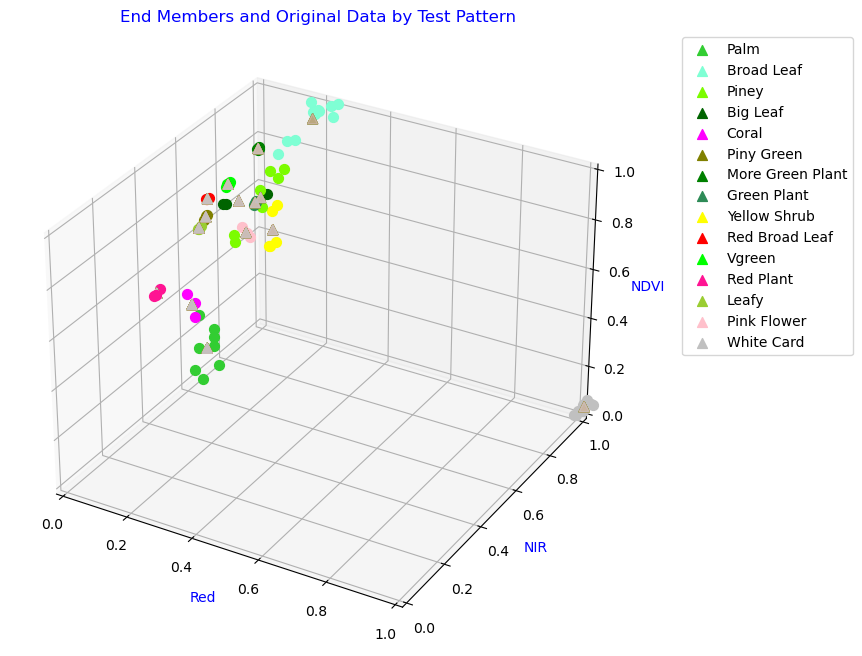

In [29]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Calculate spectral values
red_channel = df['irradiance_645nm_red_irradiance_uW_per_cm_squared'] * scaling_factor_save[9]
nir_channel = df['irradiance_860nm_linen_irradiance_uW_per_cm_squared'] * scaling_factor_save[15]
ndvi_values = (nir_channel - red_channel) / (nir_channel + red_channel)
test_patterns = df['Test']



endmember_data = calibration_df
red = df['irradiance_645nm_red_irradiance_uW_per_cm_squared'] * scaling_factor_save[9]
nir = df['irradiance_860nm_linen_irradiance_uW_per_cm_squared'] * scaling_factor_save[15]
ndvi = (nir_channel - red_channel) / (nir_channel + red_channel)
test = df['Test']


# Step 6: Create a 3D scatter plot for the original data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the cluster centers (endmembers) and create a legend for them
for test_pattern, color in test_colors.items():
    ax.scatter(endmember_data['Red_Endmember'], endmember_data['NIR_Endmember'], endmember_data['NDVI_Endmember'],
               color=color, marker='^', s=50, label=test_pattern)
              #color=color, marker='^', s=50, label=test_pattern)

# Plot the data points colored by rock_index_knn
for i, (red, nir, ndvi, test) in enumerate(zip(red_channel, nir_channel, ndvi_values, test)):
    ax.scatter(red, nir, ndvi, color=test_colors[test],marker='o', s=50,)

    
    
    
ax.set_xlabel('Red', color='blue')
ax.set_ylabel('NIR', color='blue')
ax.set_zlabel('NDVI', color='blue')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)

# Create a legend outside the plot area
plt.legend(bbox_to_anchor=(1.08, 1), loc='upper left')

plt.title('End Members and Original Data by Test Pattern', color='blue')
plt.show()


---
---
# **Knn**
---

To use k-Nearest Neighbors (kNN) for classification instead of spectral angle, you need to represent your data appropriately and use a kNN algorithm to predict the test pattern based on the spectral features of each pixel.

Here's how you can modify your code to use kNN for classification:

1. **Feature Representation**: Represent each pixel's spectral signature as a feature vector containing red, NIR, and NDVI values.

2. **Labeling**: Assign labels to each spectral signature based on the known test patterns.

3. **Model Training**: Use the labeled data to train a kNN classifier.

4. **Prediction**: Predict the test pattern for each pixel using the trained kNN classifier.

Here's an example of how you can implement this:

```python
from sklearn.neighbors import KNeighborsClassifier

# Feature representation
X = df[['red', 'nir', 'ndvi']].values

# Labels
y = df['test_pattern'].values

# Model training
knn = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors as needed
knn.fit(X, y)

# Prediction
predicted_test_patterns = knn.predict(X)

# Add predicted test patterns to DataFrame
df['Predicted_Test'] = predicted_test_patterns
```

In this example:

- `X` contains the feature vectors (red, NIR, NDVI) of each pixel.
- `y` contains the corresponding labels (test patterns).
- We initialize a kNN classifier (`KNeighborsClassifier`) with a specified number of neighbors.
- We fit the classifier to the training data (`X`, `y`).
- We use the trained classifier to predict the test pattern for each pixel.
- Finally, we add the predicted test patterns to the DataFrame.

Make sure to adjust the number of neighbors and other parameters based on your specific dataset and requirements.


## Read in the End Member data for each Test Pattern:

In [30]:
#read the file
file = r'Endmember_calibration_data.xlsx'
endmember_data = pd.read_excel(file,index_col=False)

endmember_data.head(19)

Red_Endmember  NIR_Endmember  NDVI_Endmember      Test_Pattern  \
0        0.188212       0.406040        0.366559              Palm   
1        0.099444       1.117647        0.836587        Broad Leaf   
2        0.128541       0.786107        0.718927             Piney   
3        0.105313       0.711464        0.742125          Big Leaf   
4        0.134489       0.419911        0.514831             Coral   
5        0.082460       0.579007        0.750674        Piny Green   
6        0.071453       0.870571        0.848299  More Green Plant   
7        0.127081       0.760031        0.713496       Green Plant   
8        0.179844       0.763814        0.618836      Yellow Shrub   
9        0.068482       0.611429        0.798556    Red Broad Leaf   
10       0.076389       0.704055        0.804242            Vgreen   
11       0.082397       0.330048        0.600446         Red Plant   
12       0.084403       0.540950        0.730063             Leafy   
13       0.145801       0.680394        0.647054       Pink Flower   
14       1.006392       1.034123        0.013590        White Card   

    Test_Number  
0             1  
1             2  
2             3  
3             4  
4             5  
5             6  
6             7  
7             8  
8             9  
9            10  
10           11  
11           12  
12           13  
13           14  
14           15

In [31]:
from collections import Counter 



def most_frequent(List): 
    occurence_count = Counter(List) 
    return occurence_count.most_common(1)[0][0]



n_neighbors = 1

# =============================================================================
# # ===========================================================================
# # #--------------------------------------------------------------------------
# # #
# # #            This is the beginnin of kNN Estimations
# # #
# # #--------------------------------------------------------------------------
# # ===========================================================================
# =============================================================================
  
    
# Calculate NDVI from Main dataset df                                         Scaling Factors
red_channel =   df['irradiance_645nm_red_irradiance_uW_per_cm_squared']   * scaling_factor_save[9]    # Red channel at 645nm
nir_channel =   df['irradiance_860nm_linen_irradiance_uW_per_cm_squared'] * scaling_factor_save[15]     # NIR channel at 860nm
ndvi_values =   (nir_channel - red_channel) / (nir_channel + red_channel)
test_number =   df['Test_number']
    
    
test_pattern_knn = []
    
    
# Calibration End Member Data 
Red_r   = endmember_data['Red_Endmember']
NIR_r  = endmember_data['NIR_Endmember']
NDVI_r    = endmember_data['NDVI_Endmember']
Test_r  = endmember_data['Test_Number']


# Load data
for k in range(0,len(df) ,1):  


    # =============================================================================
    # # ===========================================================================
    # # #--------------------------------------------------------------------------
    # # #           
    # # #            Read in log data 
    # # #                   
    # # #--------------------------------------------------------------------------
    # # ===========================================================================
    # =============================================================================
    Red    = red_channel[k]
    NIR    = nir_channel[k]
    NDVI   = ndvi_values[k]

    # =============================================================================
    # # ===========================================================================
    # # #--------------------------------------------------------------------------
    # # #
    # # #            This is the beginnin of kNN Estimations
    # # #
    # # #--------------------------------------------------------------------------
    # # ===========================================================================
    # =============================================================================
        

    inv_dist_array = []
    distance_knn_array = []


    dist_inv    = []
    dist_RED    = []
    dist_NIR    = []
    dist_NDVI   = []

    dist_inv_total = 0
    
    
    #this is the reference_data being used with kNN
    for i in range(0,len(calibration_df),1): 
        
                              
        # Compute Euclidian Distance inverse distance
        dist_RED.append(abs(Red - Red_r[i]))
        dist_NIR.append(abs(NIR - NIR_r[i]))
        dist_NDVI.append(abs(NDVI - NDVI_r[i]))
        dist_inv.append(1/(np.sqrt(dist_RED[i]**2 + dist_NIR[i]**2 + dist_NDVI[i]**2) + 0.0000001))

        # Calculalte inverse distance weights for perm
        ##Perm_weight.append(dist_inv[i]  * Test_r[i])
        inv_dist_array.append(dist_inv[i]);  # add items

        # =============================================================================
        ###                    KNN Array for all data
        # # ===========================================================================
        # # #--------------------------------------------------------------------------
        distance_knn_array = [dist_inv, Test_r]
        #
        # # #--------------------------------------------------------------------------
        # # ===========================================================================
        # =============================================================================

    # =============================================================================
    # # ===========================================================================
    # # #--------------------------------------------------------------------------
    # # #           
    # # #               Transpose and Sort kNN array
    # # #                   
    # # #--------------------------------------------------------------------------
    # # ===========================================================================
    # =============================================================================

    #knn_array = np.transpose array
    knn_array = np.transpose(distance_knn_array)
    

    #matsor x[x[:,column].argsort()[::-1]] and -1 us reverse order
    mat_sort = knn_array[knn_array[:,0].argsort()[::-1]] #firt column reverse sort (-1)

    # =============================================================================
    # # ===========================================================================
    # # #--------------------------------------------------------------------------
    # # #           
    # # #               Calculate test_pattern_knn
    # # #                   
    # # #--------------------------------------------------------------------------
    # # ===========================================================================
    # =============================================================================
    #------------------------------------------------------------------------------
    #print(mat_sort)
    
    
    

    List = []    
    
    for d in range(0,n_neighbors):
        List.append(mat_sort[d,1])
    
    most_frequent(List)   == test_pattern_knn
    
    which_is_most_frequent(List)
    
    
    
df['Test_knn'] = test_pattern_knn

/var/folders/lf/9hqr0q153ls52s9btzjc56080000gp/T/ipykernel_33917/2084890463.py:142: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  most_frequent(List)   == test_pattern_knn


# **Our Knn method is totally transparent:**
---

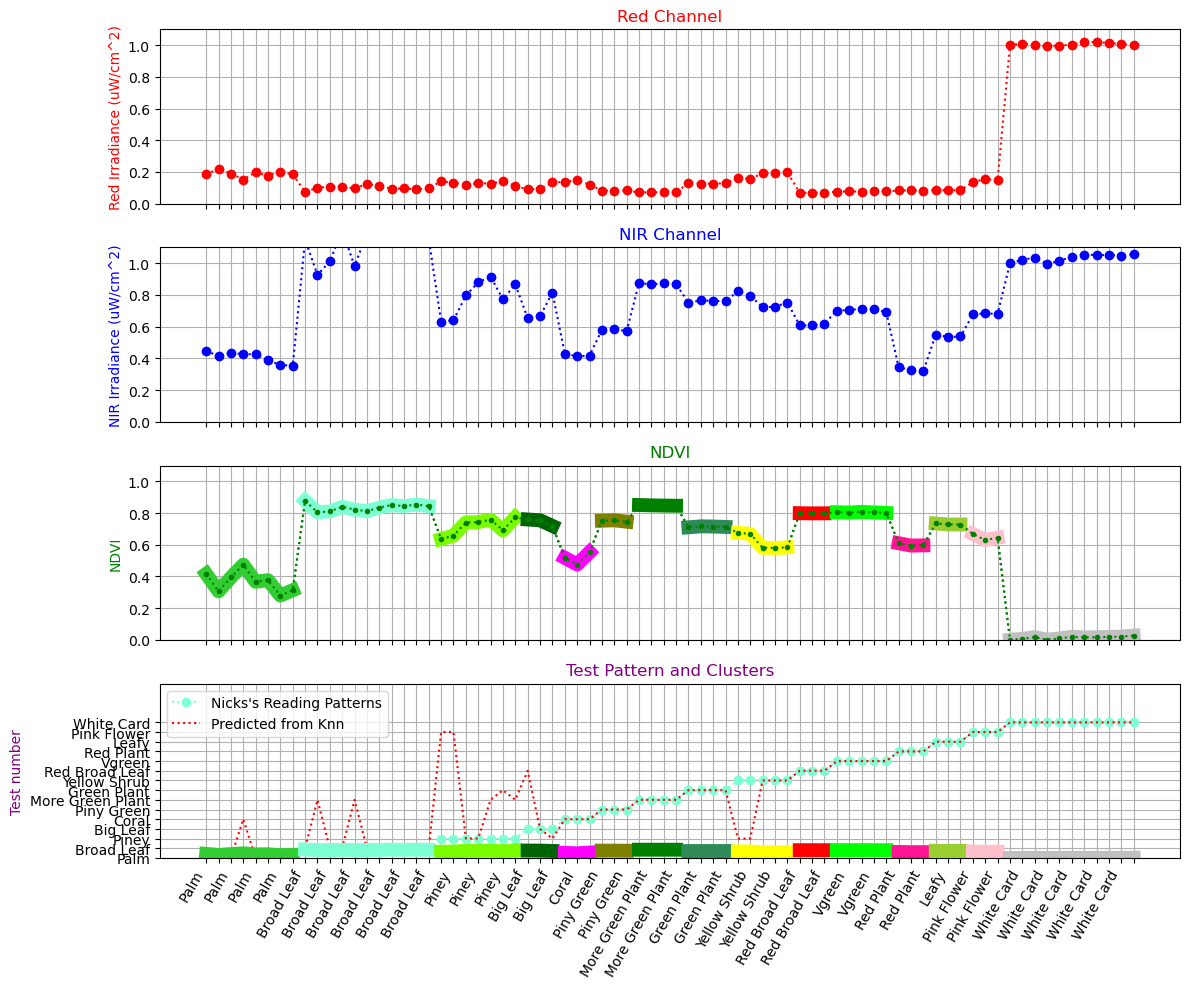

In [32]:
# Calculate NDVI                                                           Scaling Factors
red_channel =   df['irradiance_645nm_red_irradiance_uW_per_cm_squared']   * scaling_factor_save[9]    # Red channel at 645nm
nir_channel =   df['irradiance_860nm_linen_irradiance_uW_per_cm_squared'] * scaling_factor_save[15]     # NIR channel at 860nm
ndvi_values =   (nir_channel - red_channel) / (nir_channel + red_channel)
test_number =   df['Test_number']

# Create subplots
fig, axs = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# Plot Red channel
#axs[0].plot(df['timestamp_iso8601'], red_channel, color='red', linewidth=2)
axs[0].plot(df['timestamp_iso8601'], red_channel, marker='o', linestyle='dotted', color='red',label = 'Red')
axs[0].set_ylabel('Red Irradiance (uW/cm^2)', color='red')
axs[0].set_title('Red Channel', color='red')
axs[0].grid()
axs[0].set_ylim(0,1.1)



# Plot NIR channel
#axs[1].plot(df['timestamp_iso8601'], nir_channel, color='blue', linewidth=2)
axs[1].plot(df['timestamp_iso8601'], nir_channel, marker='o', linestyle='dotted', color='blue',label = 'NIR')
axs[1].set_ylabel('NIR Irradiance (uW/cm^2)', color='blue')
axs[1].set_title('NIR Channel', color='blue')
axs[1].grid()
axs[1].set_ylim(0,1.1)



# Plot NDVI
#axs[2].plot(df['timestamp_iso8601'], ndvi_values, color='green', linewidth=2)
axs[2].plot(df['timestamp_iso8601'], ndvi_values, marker='o', linestyle='dotted', color='green',label = 'NDVI')
axs[2].set_ylabel('NDVI', color='green')
axs[2].set_title('NDVI', color='green')
axs[2].grid()
axs[2].set_ylim(0,1.1)


# Loop through each unique test pattern and plot its NDVI values as a time series
for test_pattern, color in test_colors.items():
    # Filter the DataFrame for the current test pattern
    pattern_data = df[df['Test'] == test_pattern]
    
    # Plot NDVI values for the current test pattern
    axs[2].plot(pattern_data['NDVI'], label=test_pattern, color=color,lw=10)

# Set x-axis ticks to be the index of each row in the DataFrame
x_labels = df['Test']
#plt.plot(df['NDVI']) #To get the x index correct.
axs[2].plot(df['NDVI'], marker='o', markersize =3,linestyle='dotted', color='green')
#plt.plot(df['NDVI'],linestyle='dotted', color='green')

# Plot every other x-label
plt.xticks(ticks=range(len(df)), labels=['' if i % 2 != 0 else label for i, label in enumerate(x_labels)], rotation=60, ha='right')



# Plot Test
#axs[2].plot(df['timestamp_iso8601'], ndvi_values, color='green', linewidth=2)
axs[3].plot(df['timestamp_iso8601'], df['Test'], marker='o', linestyle='dotted', color='aquamarine',label="Nicks's Reading Patterns")
#axs[3].plot(df['timestamp_iso8601'], predicted,  linestyle='-', color='gray',label = 'Predicted from Decision Tree Analysis')
#axs[3].plot(df['timestamp_iso8601'], pred,  linestyle='-', color='red',label = 'Predicted from Decision Tree Logic')
#axs[3].plot(df['timestamp_iso8601'], df['Test_Pred'],  linestyle='dotted', color='blue',label = 'Predicted from Spectral Angel')
axs[3].plot(df['timestamp_iso8601'], df['Test_knn'],  linestyle='dotted', color='red',label = 'Predicted from Knn')



axs[3].set_ylabel('Test number', color='purple')
axs[3].set_title('Test Pattern and Clusters', color='purple')
axs[3].grid()
axs[3].set_ylim(0,18)
plt.legend()





for test_pattern, color in test_colors.items():
    # Filter the DataFrame for the current test pattern
    pattern_data = df[df['Test'] == test_pattern]
    
    # Plot NDVI values for the current test pattern
    plt.plot(pattern_data['NDVI'], label=test_pattern, color=color,lw=10)


    # Set common xlabel
    #plt.xlabel('Timestamp (ISO8601)', color=color)


# Set common xlabel
#plt.xlabel('Timestamp (ISO8601)', color='green')

# Show the plot
plt.tight_layout()
plt.show()
    
#print(predicted)

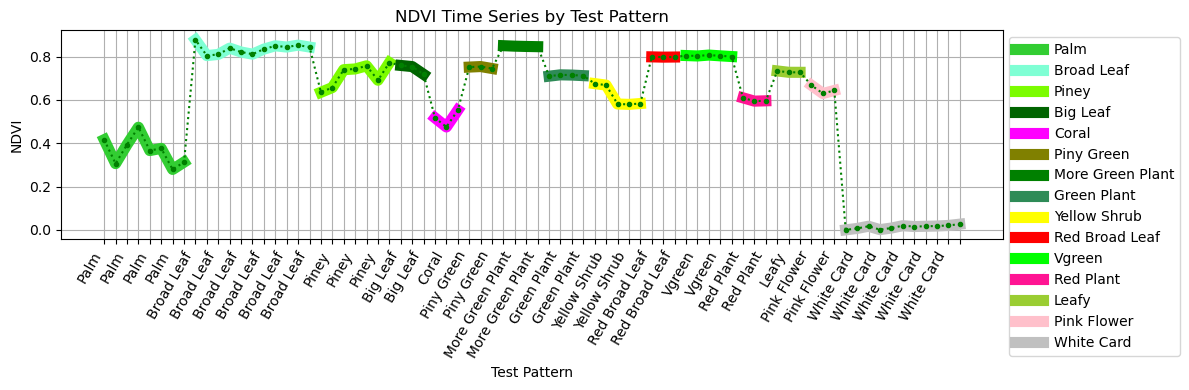

In [33]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
plt.figure(figsize=(12, 4))

# Loop through each unique test pattern and plot its NDVI values as a time series
for test_pattern, color in test_colors.items():
    # Filter the DataFrame for the current test pattern
    pattern_data = df[df['Test'] == test_pattern]
    
    # Plot NDVI values for the current test pattern
    plt.plot(pattern_data['NDVI'], label=test_pattern, color=color,lw=8)
    
x_labels = df['Test']

plt.plot(df['NDVI'], marker='o', markersize =3,linestyle='dotted', color='green')

# Plot every other x-label
plt.xticks(ticks=range(len(df)), labels=['' if i % 2 != 0 else label for i, label in enumerate(x_labels)], rotation=60, ha='right')

plt.xlabel('Test Pattern')
plt.ylabel('NDVI')
plt.title('NDVI Time Series by Test Pattern')
plt.grid()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside the plot
plt.tight_layout()
plt.show()


# **Altair Interactive Displays of NDVI:**
---

In [34]:
import altair as alt
import panel as pn

alt.data_transformers.disable_max_rows()

#pn.extension('vega')
pn.extension('tabulator')

pn.extension(sizing_mode = 'stretch_width')

import base64, io, IPython
from PIL import Image as PILImage


## 1) Resize, rotate and encode each RGB image:

In [35]:
# Resize, rotate, and encode images to base64
def resize_rotate_and_encode_image(image_path, size=(250, 250)):
    image = PILImage.open(image_path)
    image = image.resize(size)  # Resize image to the desired size
    image = image.rotate(-90, expand=True)  # Rotate image 90 degrees clockwise
    output = io.BytesIO()    
    image.save(output, format='jpeg')  # Use JPEG if you are encoding as jpeg
    encoded_string = "data:image/jpeg;base64," + base64.b64encode(output.getvalue()).decode()
    return encoded_string


df['image'] = df['ImageName'].apply(lambda x: resize_rotate_and_encode_image(x))

## Or, Resize, rotate and encode each RGB image:

To convert RGB images into thermal-like images, we can use the `matplotlib` library to apply a thermal colormap to grayscale versions of the images. Here's how you can modify your existing code to achieve this:

1. **Resize and Rotate the Image:** As in your current function.
2. **Convert the Image to Grayscale:** To simulate a thermal image, we will use the intensity of the grayscale image.
3. **Apply a Thermal Colormap:** Use `matplotlib` to apply a colormap to the grayscale image.

Here's the updated function:

```python
import io
import base64
import numpy as np
import pandas as pd
from PIL import Image as PILImage
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Resize, rotate, and encode images to base64 with thermal-like effect
def resize_rotate_and_encode_image(image_path, size=(250, 250)):
    image = PILImage.open(image_path)
    image = image.resize(size)  # Resize image to the desired size
    image = image.rotate(-90, expand=True)  # Rotate image 90 degrees clockwise
    
    # Convert to grayscale
    gray_image = image.convert('L')
    
    # Apply colormap
    gray_array = np.array(gray_image)
    colored_image = cm.inferno(gray_array / 255.0)  # Normalize the array and apply colormap
    colored_image = (colored_image[:, :, :3] * 255).astype(np.uint8)  # Convert to 8-bit RGB image
    
    # Convert back to PIL image
    thermal_image = PILImage.fromarray(colored_image)
    
    # Encode to base64
    output = io.BytesIO()
    thermal_image.save(output, format='jpeg')  # Use JPEG if you are encoding as jpeg
    encoded_string = "data:image/jpeg;base64," + base64.b64encode(output.getvalue()).decode()
    return encoded_string

# Assuming df is your DataFrame and it contains an 'ImageName' column with image paths
df['image'] = df['ImageName'].apply(lambda x: resize_rotate_and_encode_image(x))
```

### Explanation:

1. **Convert to Grayscale:**
   ```python
   gray_image = image.convert('L')
   ```
   - Converts the resized and rotated image to grayscale.

2. **Apply Colormap:**
   ```python
   gray_array = np.array(gray_image)
   colored_image = cm.inferno(gray_array / 255.0)  # Normalize the array and apply colormap
   colored_image = (colored_image[:, :, :3] * 255).astype(np.uint8)  # Convert to 8-bit RGB image
   ```
   - Normalizes the grayscale array (values between 0 and 1).
   - Applies the `inferno` colormap (or any other thermal colormap like `plasma`, `hot`, etc.).
   - Converts the resulting image back to an 8-bit RGB format.

3. **Convert Back to PIL Image and Encode:**
   ```python
   thermal_image = PILImage.fromarray(colored_image)
   output = io.BytesIO()
   thermal_image.save(output, format='jpeg')  # Use JPEG if you are encoding as jpeg
   encoded_string = "data:image/jpeg;base64," + base64.b64encode(output.getvalue()).decode()
   ```
   - Converts the numpy array with the applied colormap back to a PIL image.
   - Encodes the image to a base64 string.

## 2) This approach converts each RGB image into a thermal-like image and encodes it in base64 format for inclusion in your DataFrame.

## 3) Create near actual size thermal image resolution:

In [36]:
df.head()

device_type software_version   UID  Test_number  Test          ImageName  \
0   STELLA-Q2            2.4.0  6858            0  Palm  ./photos/Palm.jpg   
1   STELLA-Q2            2.4.0  6858            1  Palm  ./photos/Palm.jpg   
2   STELLA-Q2            2.4.0  6858            2  Palm  ./photos/Palm.jpg   
3   STELLA-Q2            2.4.0  6858            3  Palm  ./photos/Palm.jpg   
4   STELLA-Q2            2.4.0  6858            4  Palm  ./photos/Palm.jpg   

   batch  weekday  timestamp_iso8601  decimal_hour  ...  \
0      1   Friday   20240531T201526Z       20.2572  ...   
1      1   Friday   20240531T201527Z       20.2575  ...   
2      1   Friday   20240531T201529Z       20.2580  ...   
3      1   Friday   20240531T201531Z       20.2586  ...   
4      1   Friday   20240531T201532Z       20.2589  ...   

   irradiance_900nm_wheat_irradiance_uncertainty_uW_per_cm_squared  \
0                                            231.652                 
1                                            238.187                 
2                                            232.119                 
3                                            220.250                 
4                                            232.386                 

   irradiance_940nm_gold_wavelength_nm  \
0                                  940   
1                                  940   
2                                  940   
3                                  940   
4                                  940   

   irradiance_940nm_gold_wavelength_uncertainty_nm  \
0                                               10   
1                                               10   
2                                               10   
3                                               10   
4                                               10   

   irradiance_940nm_gold_irradiance_uW_per_cm_squared  \
0                                            879.704    
1                                            899.998    
2                                            859.410    
3                                            786.175    
4                                            930.880    

   irradiance_940nm_gold_irradiance_uncertainty_uW_per_cm_squared  \
0                                            105.564                
1                                            108.000                
2                                            103.129                
3                                             94.341                
4                                            111.706                

   battery_voltage  battery_percent      NDVI  Test_knn  \
0             4.12               92  0.416543      Palm   
1             4.12               92  0.306107      Palm   
2             4.12               92  0.393771      Palm   
3             4.12               92  0.474125     Coral   
4             4.11               92  0.366354      Palm   

                                               image  
0  data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...  
1  data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...  
2  data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...  
3  data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...  
4  data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...  

[5 rows x 89 columns]

alt.HConcatChart(...)
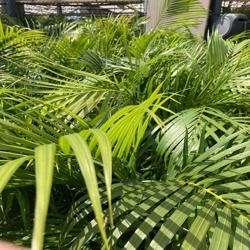
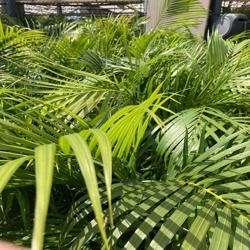
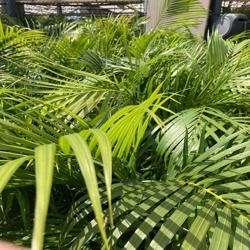
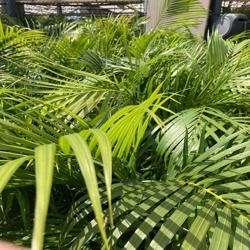
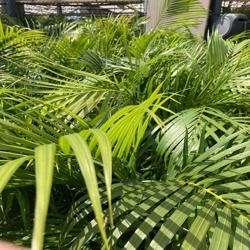
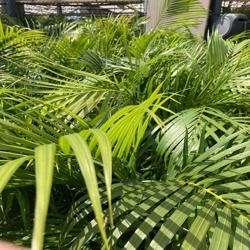
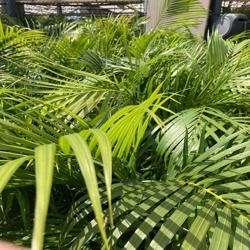
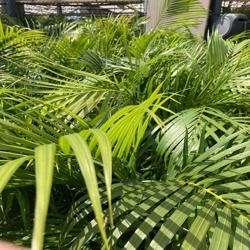
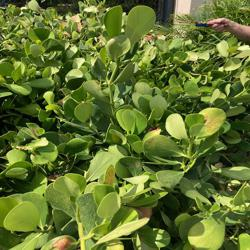
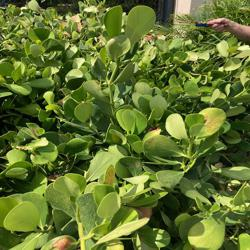
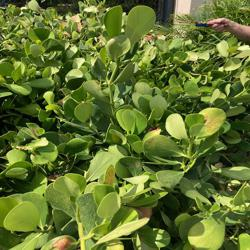
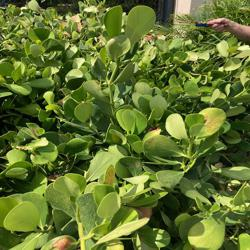
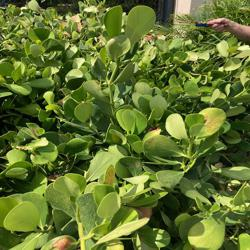
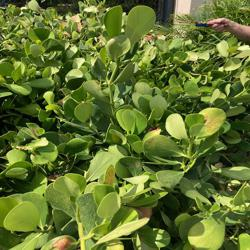
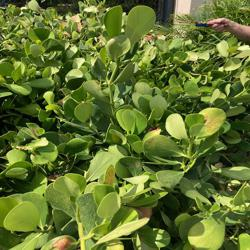
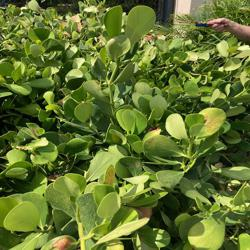
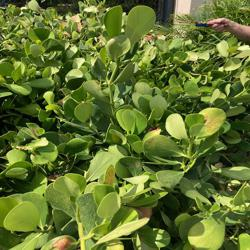
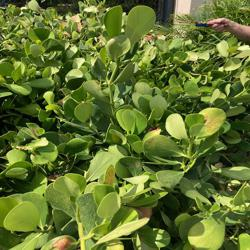
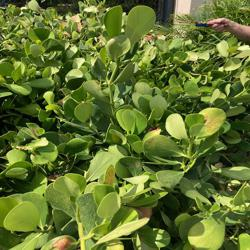
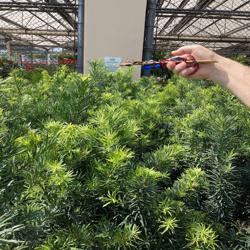
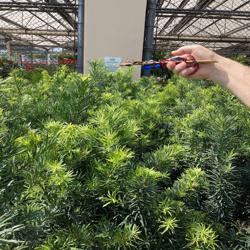
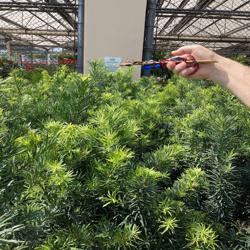
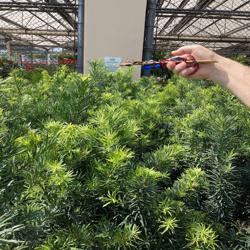
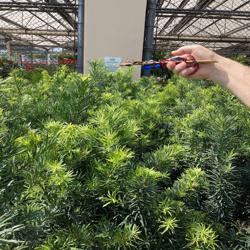
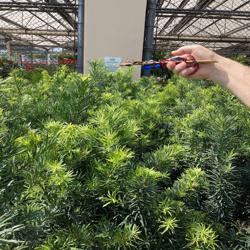
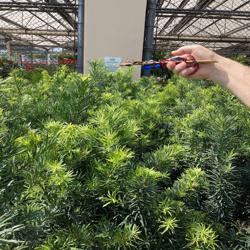
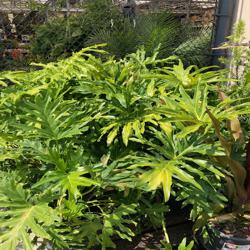
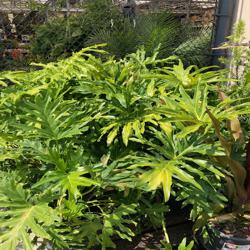
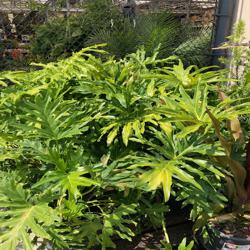
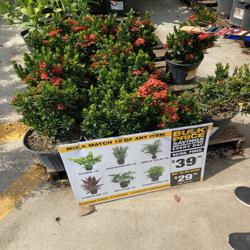
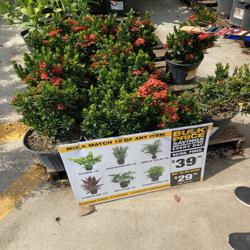
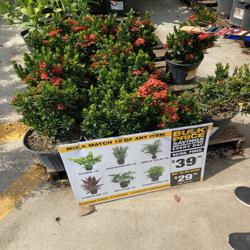
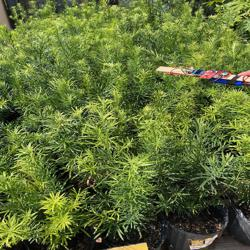
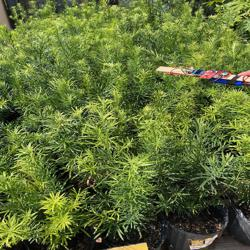
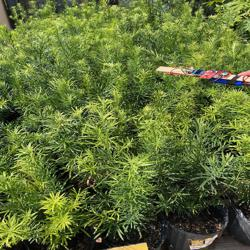
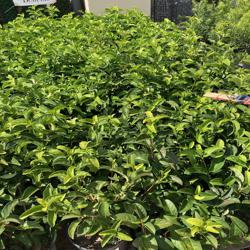
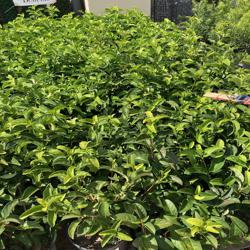
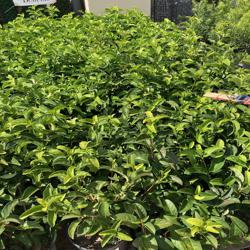
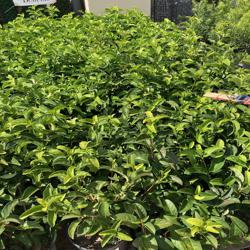
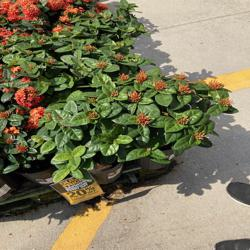
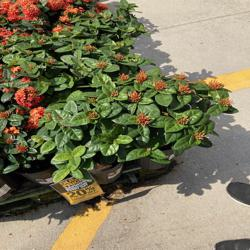
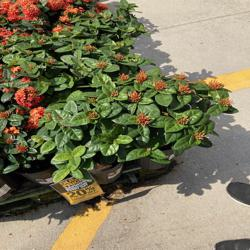
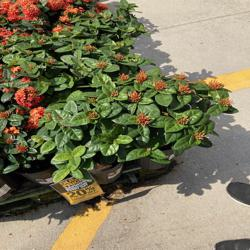
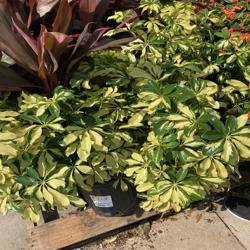
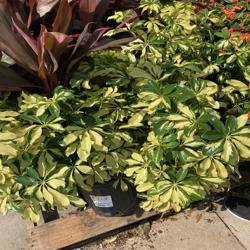
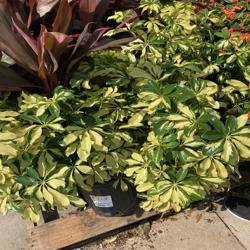
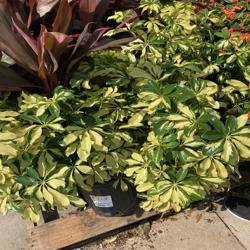
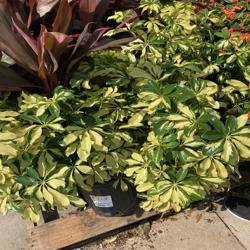
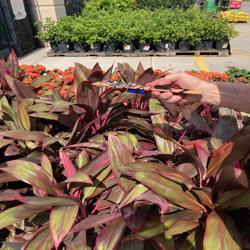
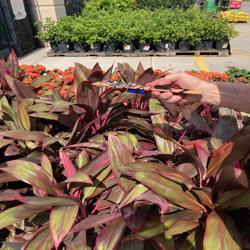
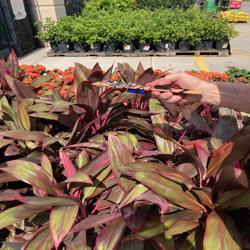
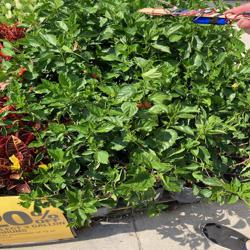
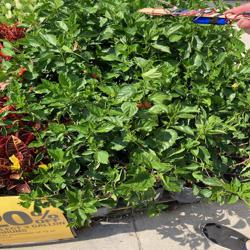
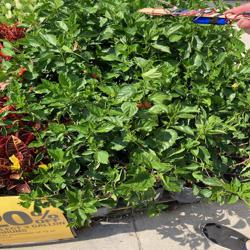
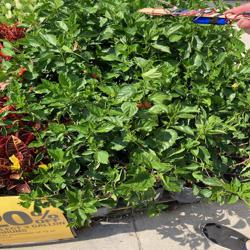
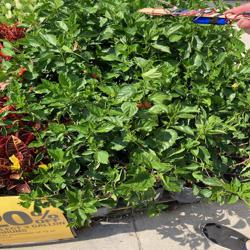
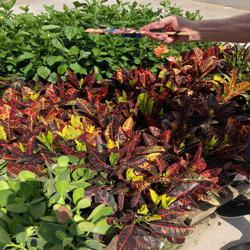
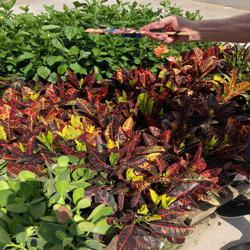
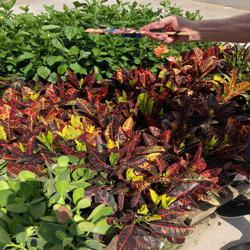
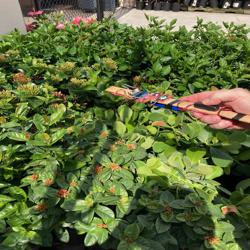
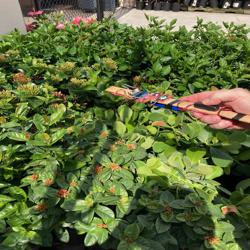
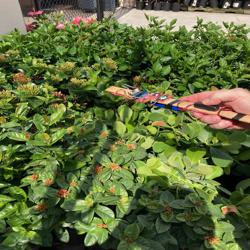
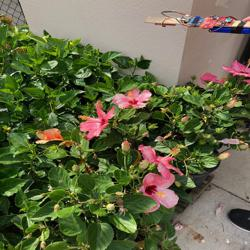
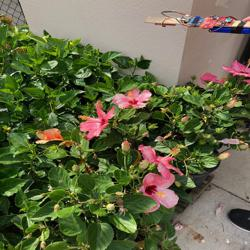
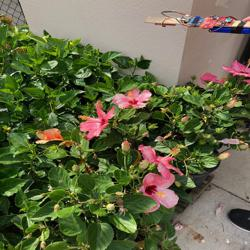
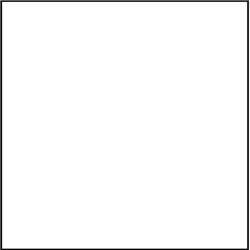
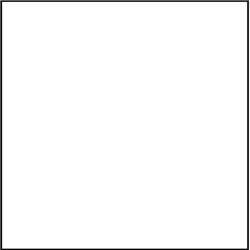
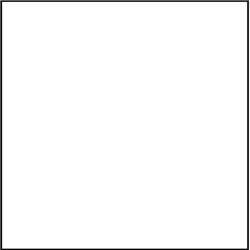
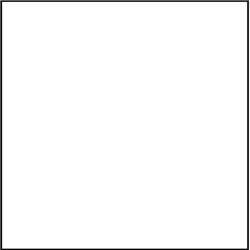
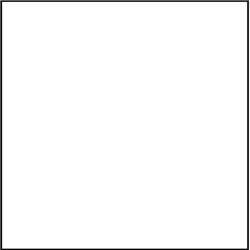
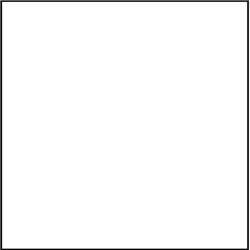
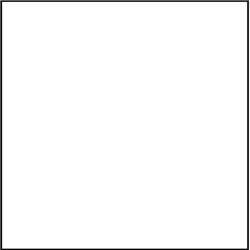
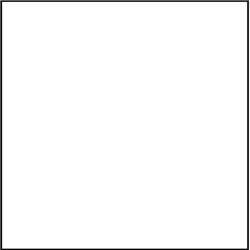
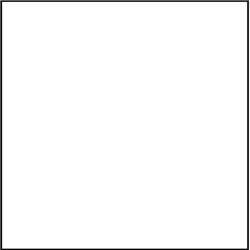
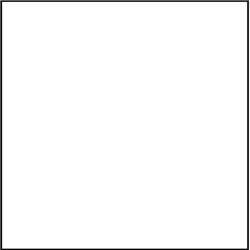
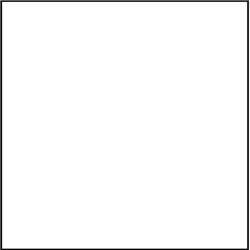

In [37]:
# Brush for selection
brush = alt.selection_interval()

# Main chart with dots and a dotted line
points = alt.Chart(df).mark_circle(size=200).encode(
    alt.X('Test_number:Q', scale=alt.Scale(domain=(0, 80))),
    alt.Y('NDVI:Q', scale=alt.Scale(domain=(0.0, 1))),
    color=alt.Color('Test:N', scale=alt.Scale(scheme='tableau20')),  # Vivid colors using tableau20 scheme
    tooltip=['image:N']
).properties(
    width=900,
    height=300,
    title='NDVI for each STELLA Reading'
).add_selection(
    brush
)


line1 = alt.Chart(df).mark_line(strokeDash=[5, 5]).encode(
    alt.X('Test_number:Q'),
    alt.Y('NDVI:Q')
)


line2 = alt.Chart(df).mark_line(strokeDash=[5, 5]).encode(
    alt.X('Test_number:Q'),
    alt.Y('NDVI:Q'),
    color=alt.Color('Test:N', scale=alt.Scale(scheme='tableau20'))  # Vivid colors for the line
)

chart = alt.layer(points, line1, line2).resolve_scale(y='shared')

# Image chart
imgs = alt.Chart(df).mark_image(width=50, height=50).encode(
    url='image:N'
).facet(
    alt.Facet('Test:N', title='Select STELLA Reading', header=alt.Header(labelFontSize=0)),
    columns=2
).transform_filter(
    brush
).transform_window(
    row_number='row_number()'
).transform_window(
    rank='rank(row_number)'
).transform_filter(
    alt.datum.rank < 50
)


# Combine the charts
chart | imgs

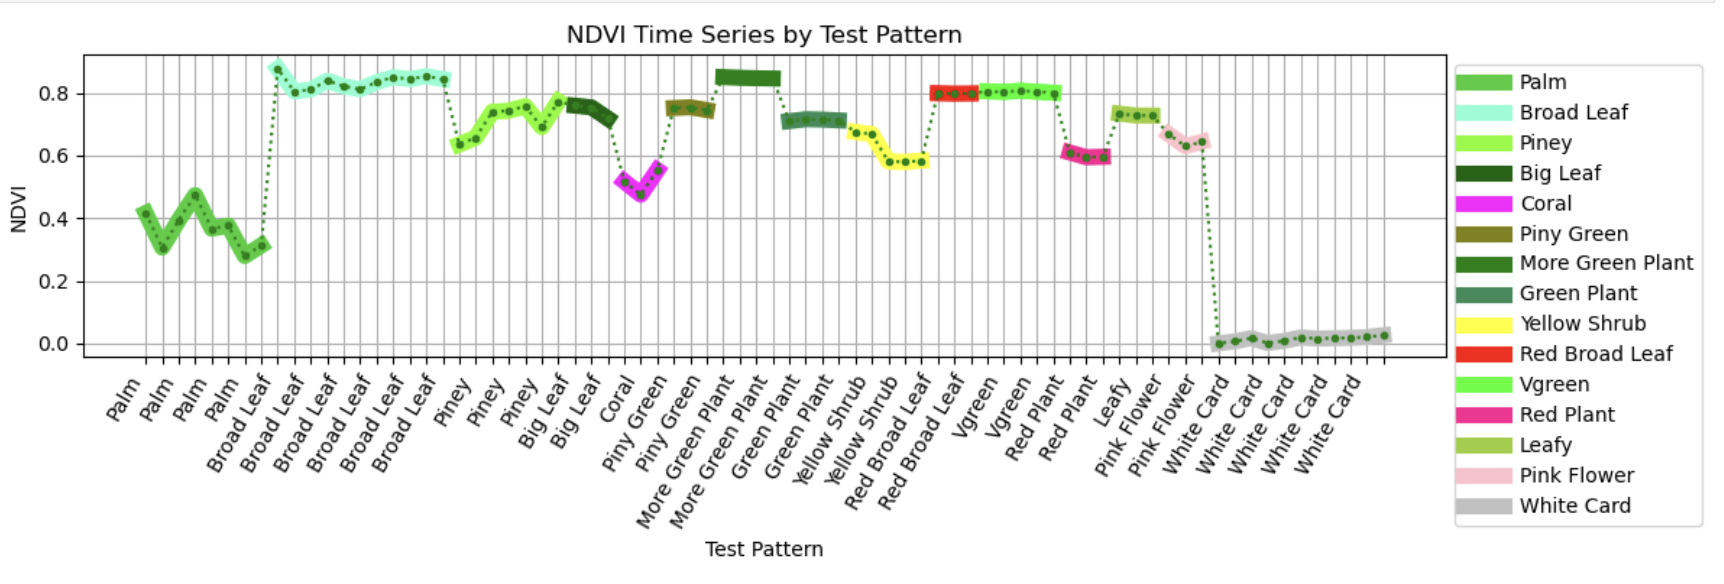

alt.HConcatChart(...)
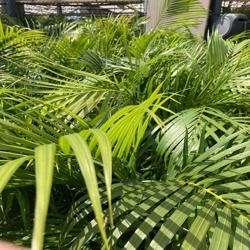
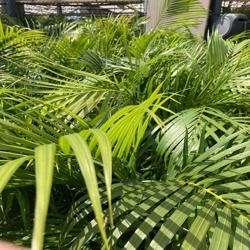
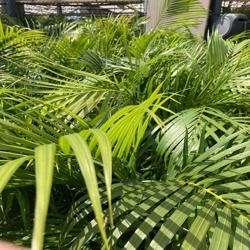
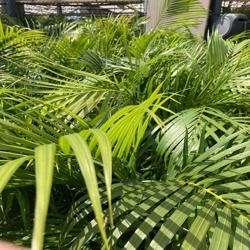
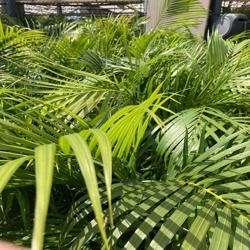
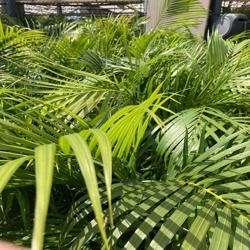
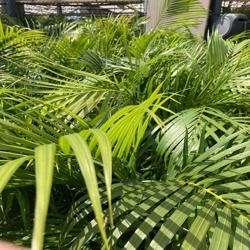
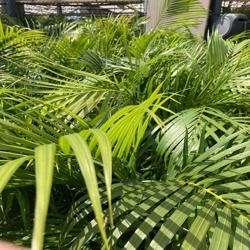
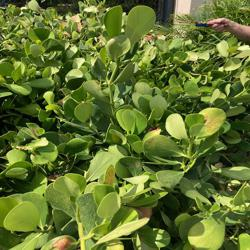
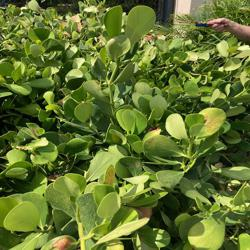
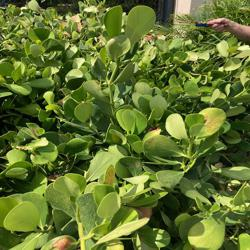
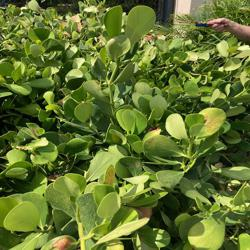
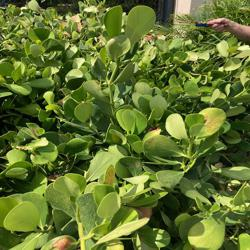
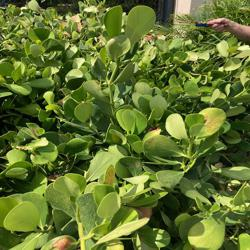
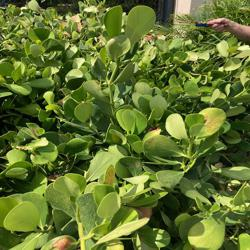
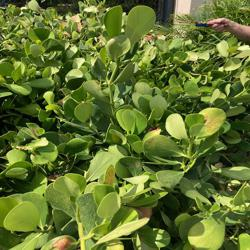
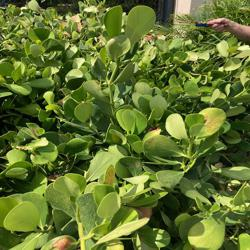
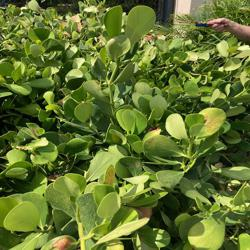
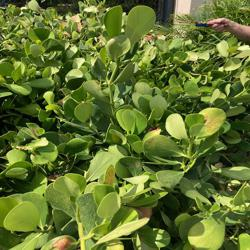
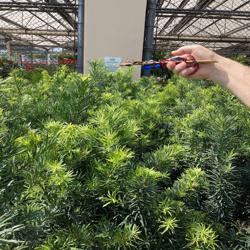
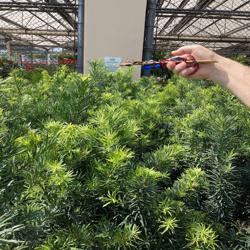
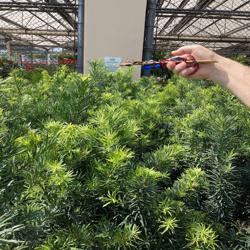
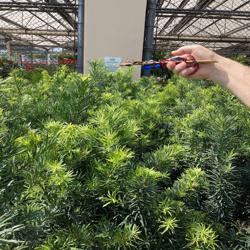
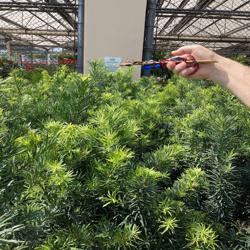
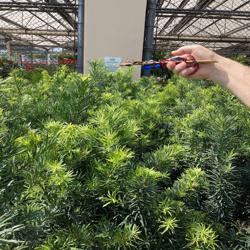
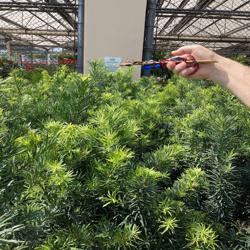
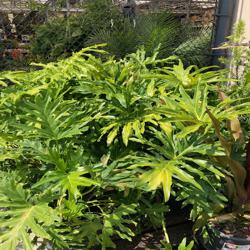
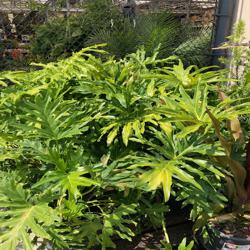
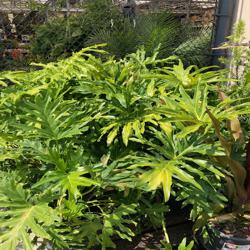
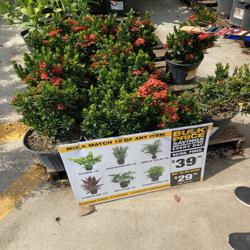
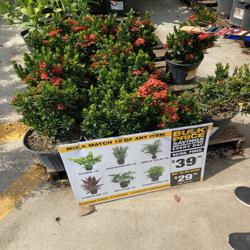
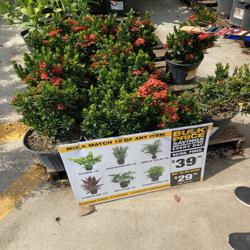
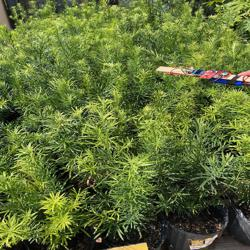
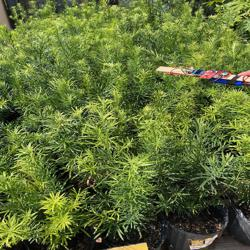
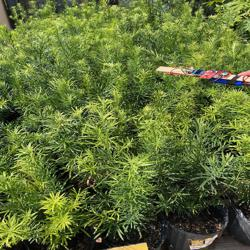
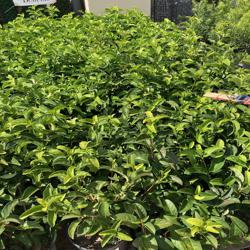
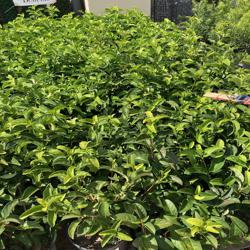
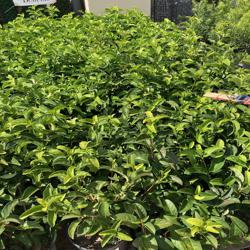
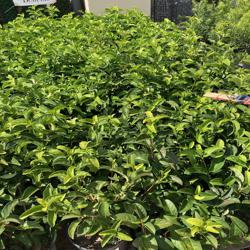
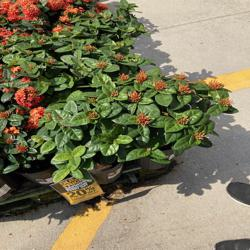
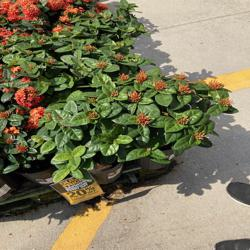
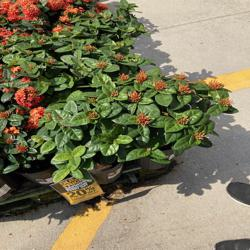
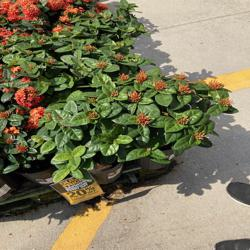
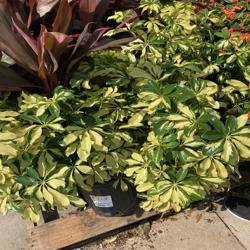
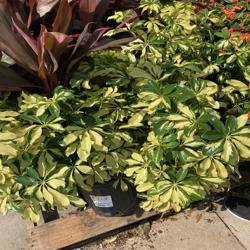
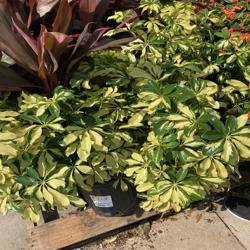
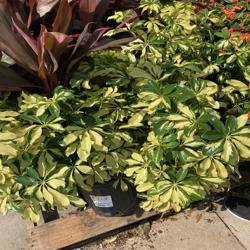
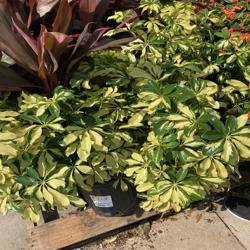
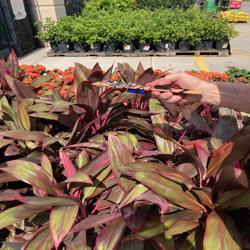
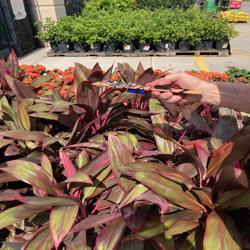
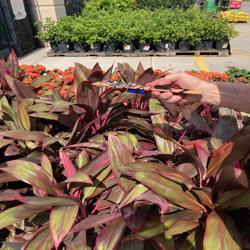
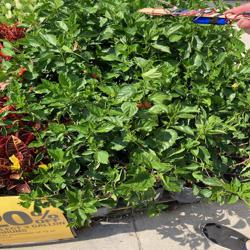
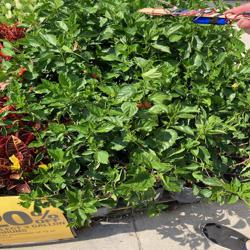
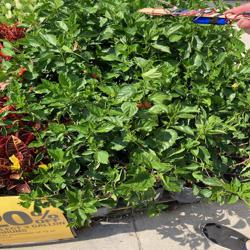
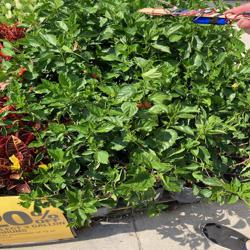
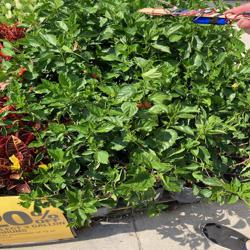
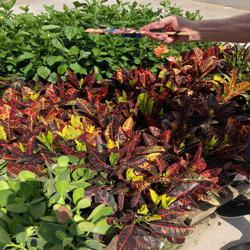
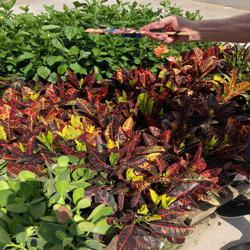
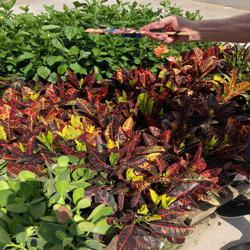
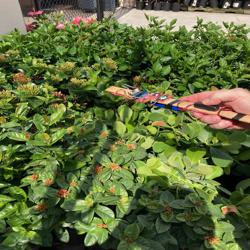
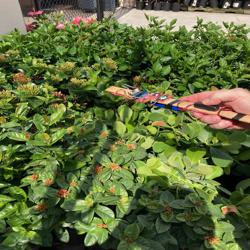
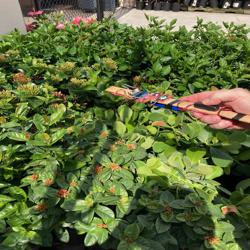
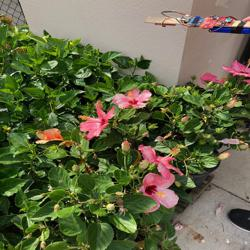
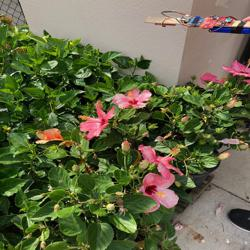
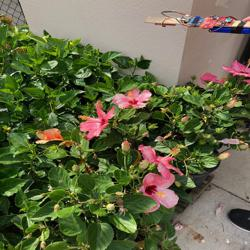
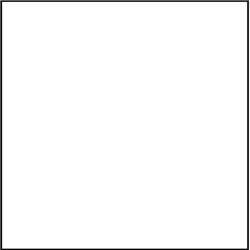
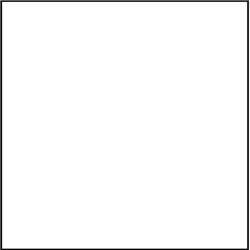
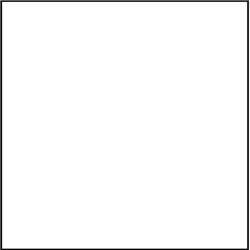
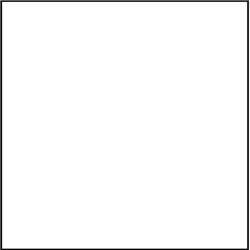
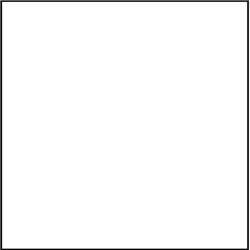
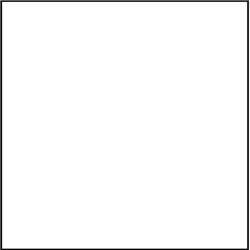
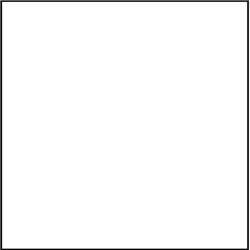
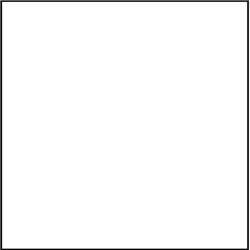
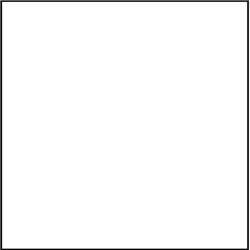
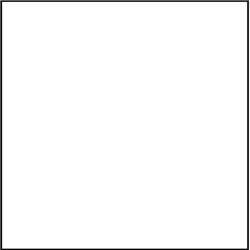
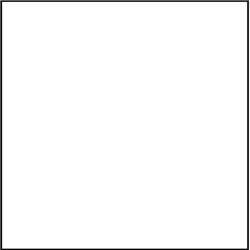

In [38]:
# Brush for selection
brush = alt.selection_interval()

# Main chart with dots and a dotted line
points = alt.Chart(df).mark_circle(size=200).encode(
    alt.X('Test:N'),  # Updated to use 'Test' instead of 'Test_number'
    alt.Y('NDVI:Q', scale=alt.Scale(domain=(0.0, 1))),
    color=alt.Color('Test:N', scale=alt.Scale(scheme='tableau20')),  # Vivid colors using tableau20 scheme
    tooltip=['image:N']
).properties(
    width=1000,
    height=300,
    title='NDVI by STELLA Reading'
).add_selection(
    brush
)

line = alt.Chart(df).mark_line(strokeDash=[5, 5]).encode(
    alt.X('Test:N'),  # Updated to use 'Test' instead of 'Test_number'
    alt.Y('NDVI:Q'),
    color=alt.Color('Test:N', scale=alt.Scale(scheme='tableau20'))  # Vivid colors for the line
)

chart = alt.layer(points).resolve_scale(y='shared')

# Image chart
imgs = alt.Chart(df).mark_image(width=50, height=50).encode(
    url='image:N'
).facet(
    alt.Facet('Test:N', title='Select STELLA Reading', header=alt.Header(labelFontSize=0)),
    columns=2
).transform_filter(
    brush
).transform_window(
    row_number='row_number()'
).transform_window(
    rank='rank(row_number)'
).transform_filter(
    alt.datum.rank < 50
)

# Combine the charts
chart | imgs

In [39]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

# Thermal Camera from AdaFruit

https://docs.circuitpython.org/projects/mlx90640/en/latest/

The code is setting up and using an MLX90640 thermal camera sensor to capture and display thermal images. 

1. **Importing Libraries:**
   ```python
   import time
   import board
   import busio
   import adafruit_mlx90640
   ```
   - `time`: Provides various time-related functions.
   - `board`: Provides pin definitions for the board being used (e.g., Raspberry Pi).
   - `busio`: Provides I2C and SPI bus interfaces.
   - `adafruit_mlx90640`: Library for interfacing with the MLX90640 thermal camera.

2. **Setting Up the I2C Bus:**
   ```python
   i2c = busio.I2C(board.SCL, board.SDA, frequency=800000)
   ```
   - Initializes the I2C bus with a specified frequency of 800 kHz using the `SCL` and `SDA` pins from the `board` library.

3. **Initializing the MLX90640 Sensor:**
   ```python
   mlx = adafruit_mlx90640.MLX90640(i2c)
   print("MLX addr detected on I2C", [hex(i) for i in mlx.serial_number])
   ```
   - Creates an instance of the MLX90640 sensor connected via the I2C bus.
   - Prints the serial number of the MLX90640 sensor in hexadecimal format.

4. **Setting the Refresh Rate:**
   ```python
   mlx.refresh_rate = adafruit_mlx90640.RefreshRate.REFRESH_2_HZ
   ```
   - Sets the refresh rate of the sensor to 2 Hz (2 frames per second).

5. **Reading and Printing Thermal Frames:**
   ```python
   frame = [0] * 768
   while True:
       try:
           mlx.getFrame(frame)
       except ValueError:
           # these happen, no biggie - retry
           continue

       for h in range(24):
           for w in range(32):
               t = frame[h*32 + w]
               print("%0.1f, " % t, end="")
           print()
       print()
   ```
   - Initializes a list `frame` with 768 zeros to hold temperature data for each pixel (the MLX90640 has a 24x32 resolution, which is 768 pixels).
   - Enters an infinite loop to continuously read frames from the sensor.
   - Uses a `try` block to attempt to read a frame of temperature data. If a `ValueError` occurs (which can happen with this sensor), it catches the exception and retries.
   - For each frame, iterates over the 24 rows (`h`) and 32 columns (`w`), retrieving and printing the temperature values for each pixel in a formatted manner.
   - Prints an additional newline to separate frames.

This code captures thermal images from the MLX90640 sensor at a rate of 2 frames per second and prints the temperature values for each pixel to the console.

In [ ]:
import time
import board
import busio
import adafruit_mlx90640

i2c = busio.I2C(board.SCL, board.SDA, frequency=800000)

mlx = adafruit_mlx90640.MLX90640(i2c)
print("MLX addr detected on I2C", [hex(i) for i in mlx.serial_number])

# if using higher refresh rates yields a 'too many retries' exception,
# try decreasing this value to work with certain pi/camera combinations
mlx.refresh_rate = adafruit_mlx90640.RefreshRate.REFRESH_2_HZ

frame = [0] * 768
while True:
    try:
        mlx.getFrame(frame)
    except ValueError:
        # these happen, no biggie - retry
        continue

    for h in range(24):
        for w in range(32):
            t = frame[h*32 + w]
            print("%0.1f, " % t, end="")
        print()
    print()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate Sample Data
# Create a 24x32 array with random temperature values between 20 and 40 degrees Celsius
sample_data = np.random.uniform(20, 40, (24, 32))

# Step 2: Convert Data to Thermal Image
plt.imshow(sample_data, cmap='inferno')
plt.colorbar(label='Temperature (°C)')
plt.title('Simulated Thermal Image')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate Sample Data
# Create a 24x32 array with random temperature values between 20 and 40 degrees Celsius
sample_data = np.random.uniform(20, 40, (24, 32))

# Define a list of colormaps to use
colormaps = ['inferno', 'plasma', 'hot', 'magma', 'jet']

# Step 2: Convert Data to Thermal Images using different colormaps
fig, axs = plt.subplots(1, len(colormaps), figsize=(20, 5))

for ax, cmap in zip(axs, colormaps):
    im = ax.imshow(sample_data, cmap=cmap)
    ax.set_title(cmap)
    fig.colorbar(im, ax=ax, orientation='vertical', label='Temperature (°C)')

plt.suptitle('Simulated Thermal Images with Different Colormaps')
plt.show()
